<a href="https://colab.research.google.com/github/manish021996/Bike_Sharing_Demand_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**




##### **Project Type**    - Classification
##### **Contribution**    - Individual
#### **Name**            - **Manish H Magarde**             

# **Project Summary -**

This project utilizes data from an ongoing cardiovascular study conducted in Framingham, Massachusetts, consisting of over 4,000 records with 15 attributes.

The main objective is to predict a patient's 10-year risk of future coronary heart disease (CHD) using various demographic, behavioral, and medical risk factors.

After evaluating multiple machine learning models, including LogisticLigression,Decision Tree, Random Forest, XGBOOST, and KNN, Naive Bayes and SVM with GridSearchCV, the best-performing models were identified based on high recall scores.

The key important features influencing the prediction include age, heart_rate, total_cholesterol, Cigs_per_day, and education, providing valuable insights for assessing and managing CHD risk in patients.

# **GitHub Link -**

https://github.com/manish021996/Cardiovascular-Risk-Prediction

# **Problem Statement**


* **The classification goal is to predict whether the patient has a 10-year risk of future Cardiovascular Disease (CVD) considering the other features.**
* **Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and, in some cases, even death.**
* **As a result, it is critical that we accurately predict the risk of heart disease in order to avert as many fatalities as possible.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'Total numbers of duplicate rows in dataset  : {len(df[df.duplicated()])}')

Total numbers of duplicate rows in dataset  : 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

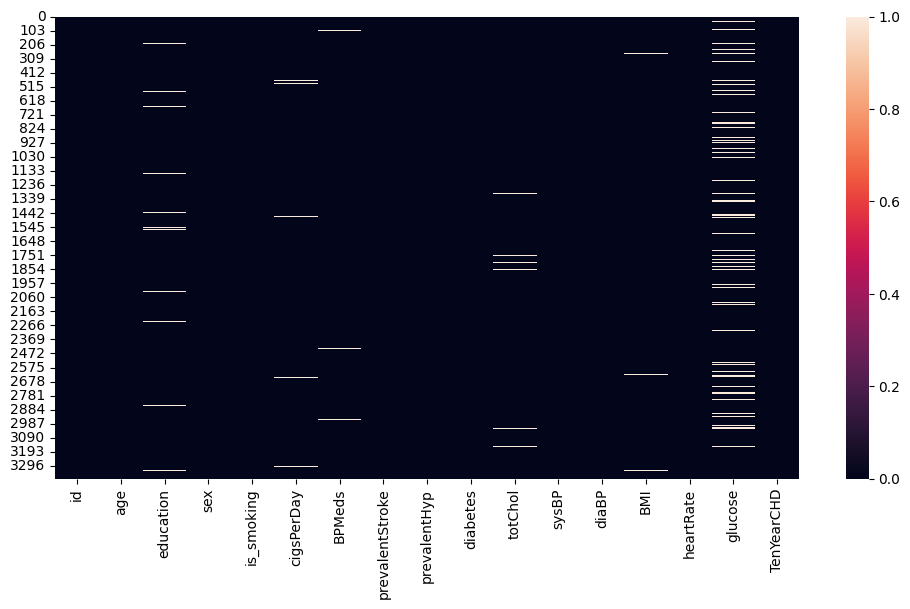

In [10]:
# Visualizing the missing values
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull())

### What did you know about your dataset?

1. The dataset is from an ongoing **cardiovascular study** on residents of the town of Framingham, Massachusetts and our **goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

2. The dataset consists of **3390 rows and 17 columns.

3. Among these columns, 6 are of integer type, 2 are of object type, and 9 are of float type.

4. There are **some missing or null values** in education, cigsPerDay, BPMeds, totChol, BMI, glucose, heartRate columns which need to be treated.

5. There are **no duplicate rows** in the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

count         mean         std     min     25%      50%  \
id               3390.0  1694.500000  978.753033    0.00  847.25  1694.50   
age              3390.0    49.542183    8.592878   32.00   42.00    49.00   
education        3303.0     1.970936    1.019081    1.00    1.00     2.00   
cigsPerDay       3368.0     9.069477   11.879078    0.00    0.00     0.00   
BPMeds           3346.0     0.029886    0.170299    0.00    0.00     0.00   
prevalentStroke  3390.0     0.006490    0.080309    0.00    0.00     0.00   
prevalentHyp     3390.0     0.315339    0.464719    0.00    0.00     0.00   
diabetes         3390.0     0.025664    0.158153    0.00    0.00     0.00   
totChol          3352.0   237.074284   45.247430  107.00  206.00   234.00   
sysBP            3390.0   132.601180   22.292030   83.50  117.00   128.50   
diaBP            3390.0    82.883038   12.023581   48.00   74.50    82.00   
BMI              3376.0    25.794964    4.115449   15.96   23.02    25.38   
heartRate        3389.0    75.977279   11.971868   45.00   68.00    75.00   
glucose          3086.0    82.086520   24.244753   40.00   71.00    78.00   
TenYearCHD       3390.0     0.150737    0.357846    0.00    0.00     0.00   

                     75%     max  
id               2541.75  3389.0  
age                56.00    70.0  
education           3.00     4.0  
cigsPerDay         20.00    70.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           264.00   696.0  
sysBP             144.00   295.0  
diaBP              90.00   142.5  
BMI                28.04    56.8  
heartRate          83.00   143.0  
glucose            87.00   394.0  
TenYearCHD          0.00     1.0

In [13]:
# statistics of object type variables
df.describe(include = 'O')

sex is_smoking
count   3390       3390
unique     2          2
top        F         NO
freq    1923       1703

### Variables Description

### **Demographic:**

• **Sex:** male or female("M" or "F")

• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral:**

• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history):**

• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

• **Diabetes:** whether or not the patient had diabetes (Nominal)

### **Medical(current):**

• **Tot Chol:*** total cholesterol level (Continuous)

• **Sys BP:** systolic blood pressure (Continuous)

• **Dia BP:** diastolic blood pressure (Continuous)

• **BMI:** Body Mass Index (Continuous)

• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose:** glucose level (Continuous)

### **Predict variable (desired target):**

• **10-year risk of coronary heart disease CHD** (binary: “1”, means “Yes” , “0” means “No”) - DEPENDANT VARIABLE

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Dropping id column
df.drop(columns = 'id', inplace = True)

In [16]:
# Renaming some columns for easy to use
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [17]:
# Encoding Binary columns
# F = 0, M = 1
df['sex'] = np.where(df['sex'] == 'F', 0,1)

# No = 0, Yes = 1
df['is_smoking'] = np.where(df['is_smoking'] == 'YES', 1,0)

In [18]:
""" creating 3 list for EDA purpose
1. dep_var = Dependent Variable
2. cat_var = having all categorical columns
3. cont_var = columns where values are contineous """

dep_var = ['ten_year_chd']
cat_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']
cont_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']

In [19]:
# checking dataset after data manipulations
df.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0   64        2.0    0           1           3.0      0.0                 0   
1   36        4.0    1           0           0.0      0.0                 0   
2   46        1.0    0           1          10.0      0.0                 0   
3   50        1.0    1           1          20.0      0.0                 0   
4   64        1.0    0           1          30.0      0.0                 0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0              0         0              221.0        148.0          85.0   
1              1         0              212.0        168.0          98.0   
2              0         0              250.0        116.0          71.0   
3              1         0              233.0        158.0          88.0   
4              0         0              241.0        136.5          85.0   

     bmi  heart_rate  glucose  ten_year_chd  
0    NaN        90.0     80.0             1  
1  29.77        72.0     75.0             0  
2  20.35        88.0     94.0             0  
3  28.26        68.0     94.0             1  
4  26.42        70.0     77.0             0

### What all manipulations have you done and insights you found?

1. **Remove the 'id' column** from the dataset as it doesn't provide any relevant information.

2. Improve column names to **enhance usability and clarity.**

3. **Perform binary encoding** for the 'sex' and 'is_smoking' columns, transforming "F" to 0 and "M" to 1, and "Yes" to 1 and "No" to 0, respectively.

4. **Create three new lists for better organization:**

* **dep_var:** Represents the dependent variable of the dataset.
* **cat_var:** Contains columns with categorical values.
* **cont_var:** Contains columns with continuous numerical values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Categorical Feature Analysis**

#### **Analyzing the distribution of the categorical independent variables wrt dependent variable:**

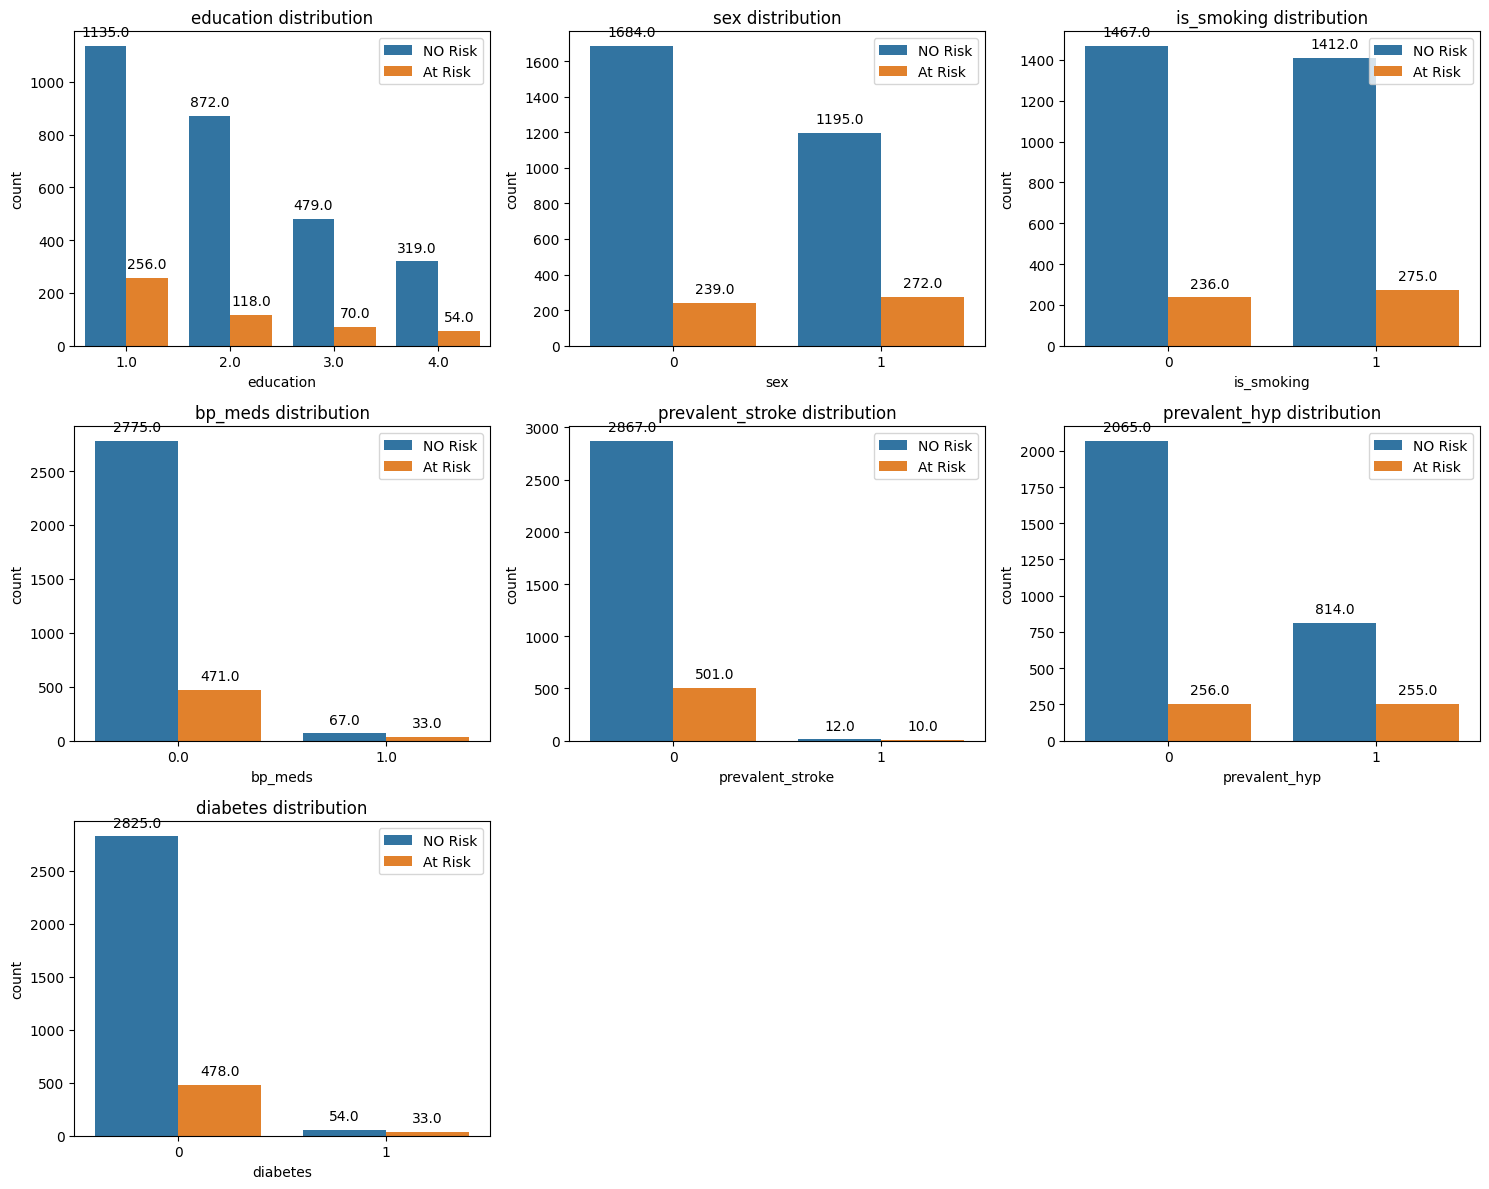

In [20]:
# Analysing the distribution of categorical variables in the dataset wrt dependent variable through countplot
plt.figure(figsize=(15,12))
for i, col in enumerate(cat_var):
  plt.subplot(3,3,i+1)
  grp = sns.countplot(data = df, x = col, hue = 'ten_year_chd')
  plt.title(col + ' distribution',fontsize = 12)
  plt.legend(['NO Risk','At Risk'])

  # getting the count of each bar
  for col in grp.patches:
   grp.annotate(f'{col.get_height()}', (col.get_x() + col.get_width() / 2., col.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.tight_layout();

Based on the visualizations above, we can draw the following conclusions:

* The **majority of patients** in the study have an **education level of 1**.
* The **majority of patients are female**.
* The distribution of **smokers and non-smokers is almost evenly split** (around 50% each).
* Approximately **100 patients are taking blood pressure (BP) medication.**
* Around **22 patients** in the study **have experienced a stroke**.
* There are around **1100 patients with hypertension.**
* There are **87 patients diagnosed with diabetes.**

#### **Percentage wise analysis of categorical variables wrt dependent variable.**

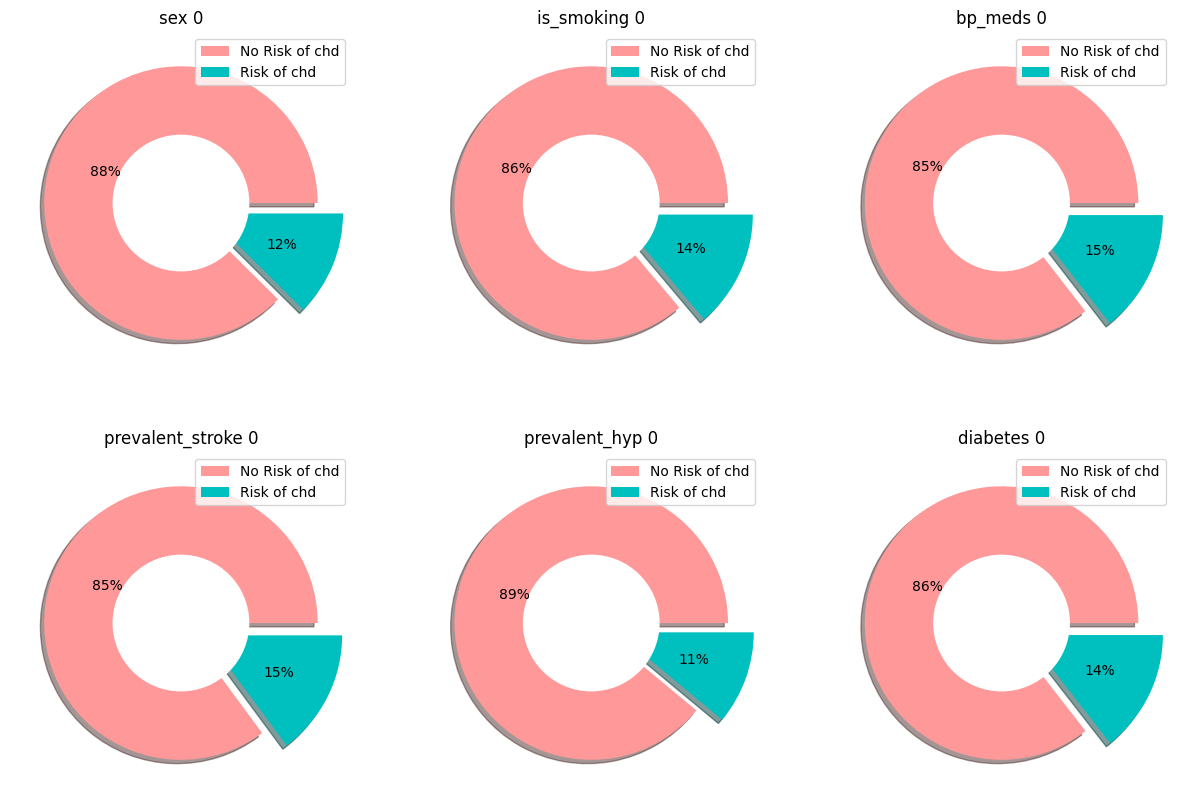

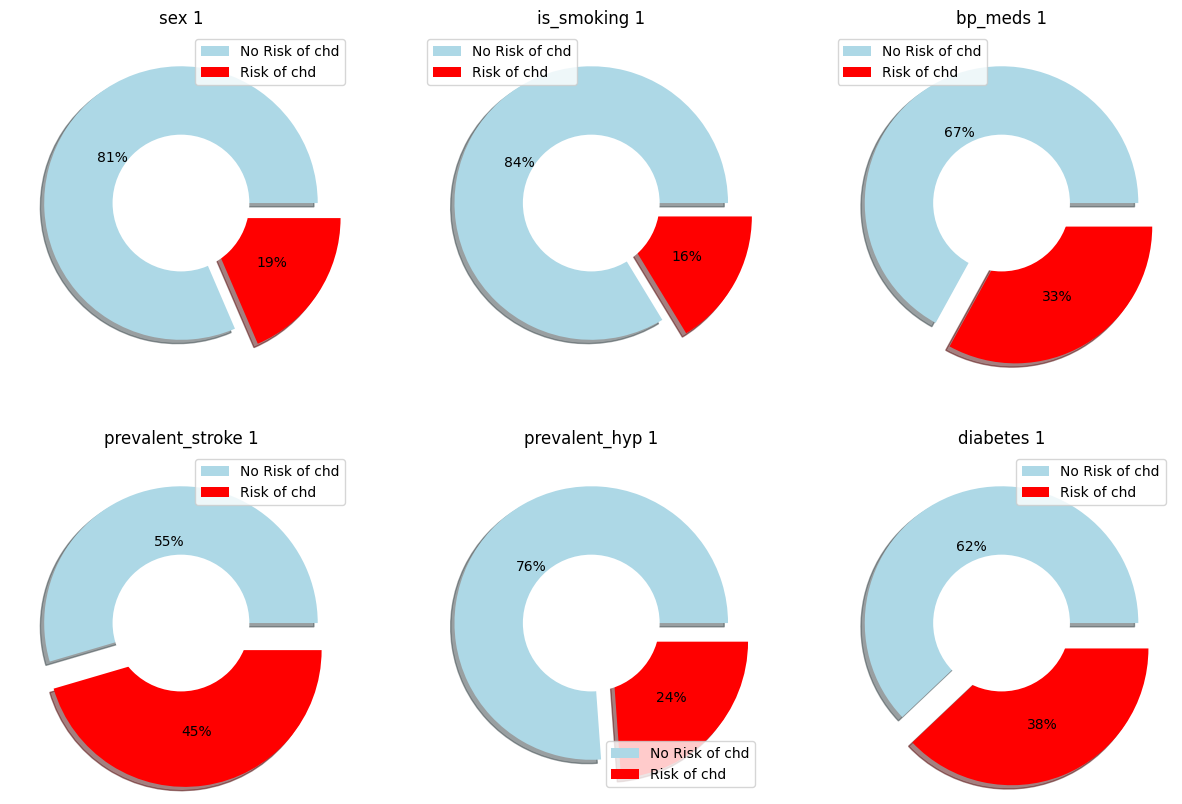

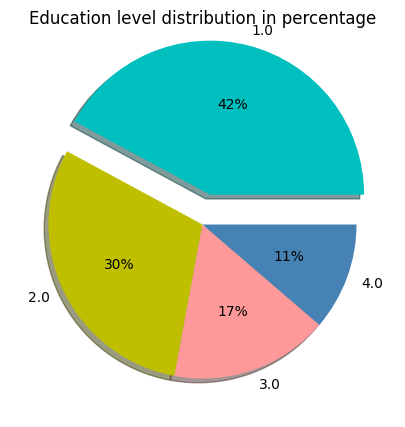

In [21]:
#Using donut chart for getting the percentage of different features with value = 0 on CVD's
plt.figure(figsize = (15,10))
for n,i in enumerate(cat_var):
  if i != 'education':
    data_0 = df[df[i]==0].groupby(['ten_year_chd']).count()[i]
    plt.subplot(2,3,n)

    # plotting data on pie chart
    plt.pie(data_0, explode=(0,0.2), autopct='%.0f%%',shadow=True, colors= ['#ff9999','c'])

    # creating white circle inside pie chhart
    center_circle = plt.Circle((0, 0), 0.50, fc='white')
    plt.gca().add_artist(center_circle)
    plt.title(f'{i} 0')
    plt.legend(['No Risk of chd','Risk of chd'])


#Using donut chart getting the percentage of different features with value = 1 on CVD's
plt.figure(figsize=(15,10))
for n,i in enumerate(cat_var):
  if i != 'education':
    data1 = df[df[i]==1].groupby(['ten_year_chd']).count()[i]
    plt.subplot(2,3,n)

    # plotting data on pie chart
    plt.pie(data1,explode=(0,0.2), autopct='%.0f%%',shadow=True, colors = ['lightblue','red'])

    # creating a white circle inside pie chart
    center_circle = plt.Circle((0, 0), 0.50, fc='white')
    plt.gca().add_artist(center_circle)
    plt.title(f'{i} 1')
    plt.legend(['No Risk of chd','Risk of chd'])


# pie chart for visulization data of education level
plt.figure(figsize = (6,5))
data_edu = df.groupby('education')['ten_year_chd'].count()
plt.pie(data_edu, explode=(0.2,0,0,0), labels = ['1.0','2.0','3.0','4.0'], autopct='%.0f%%', shadow=True,  colors = ['c','y','#ff9999','steelblue'] )
plt.title('Education level distribution in percentage')
plt.show()


Based on the information presented in the pie charts above, the following conclusions can be drawn:

* **Males have a higher risk of Coronary Heart Disease** (CHD) at approximately 19%, compared to females at 12%.
* **Patients who smoke have a higher risk of CHD**, approximately 16%, compared to non-smokers at 14%.
* **Patients taking BP medicine have a significantly higher risk of CHD** at approximately 33%, compared to other patients at 15%.
* **Patients who have experienced a stroke exhibit a notably higher risk of CHD** at approximately 45%, compared to other patients at 15%.
* **Hypertensive patients have a significantly elevated risk of CHD**, approximately 24%, in contrast to other patients at 11%.
* **Diabetic patients have a higher risk of CHD**, approximately 38%, compared to other patients at 11%

### **Numerical Features Analysis**

#### **Checking Linearity**

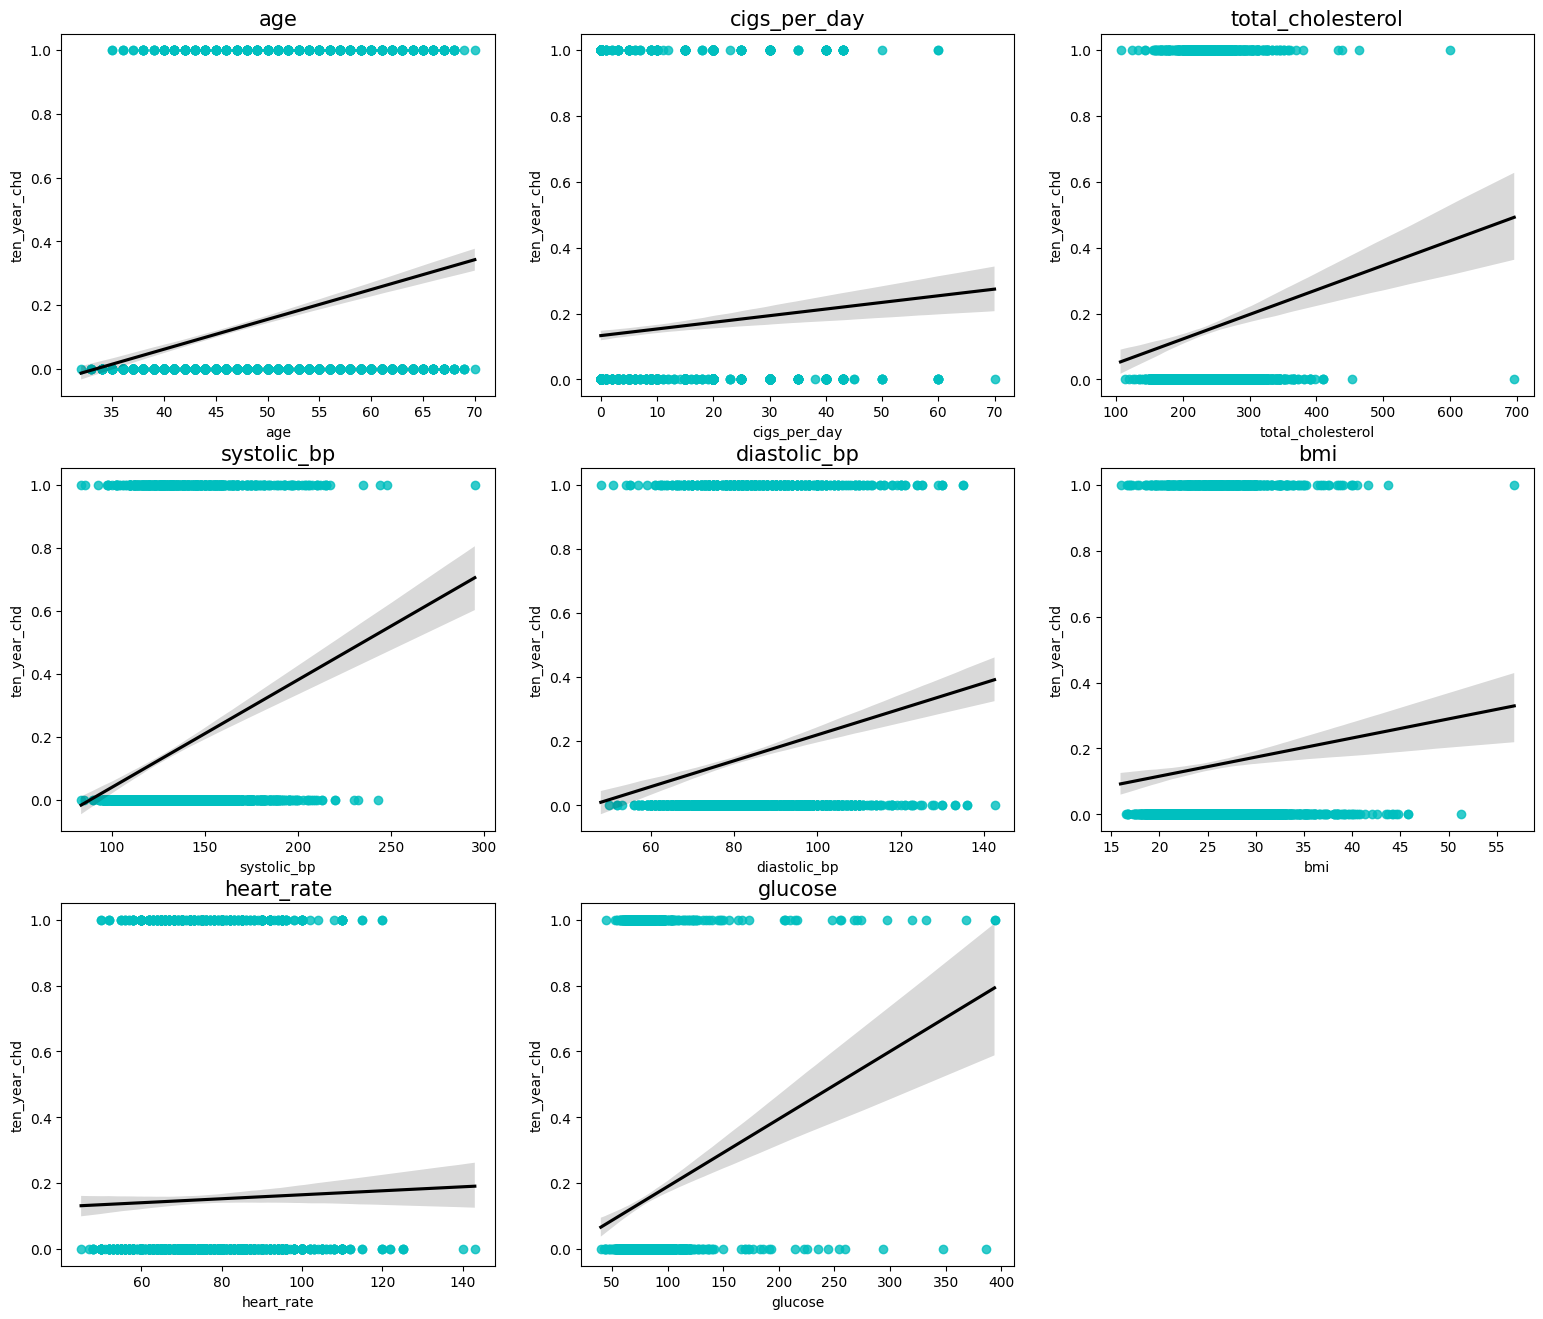

In [22]:
# for loop, for visualizing the Regression plot of all continuous features by Reg plot
plt.figure(figsize = (19,16))
for i, col in enumerate(cont_var):
  plt.subplot(3,3,i+1)
  sns.regplot(x = df[col], y = df['ten_year_chd'], scatter_kws = {'color':'c'}, line_kws={'color':'black'});
  plt.title(col, fontsize = 15)
plt.show()

* We have discovered a significant **positive relationship between all the continuous variables and our target variable**, which is the 10-year risk of Coronary Heart Disease (ten_year_chd).

* Specifically, we observed **strong positive correlations between the variables total_cholesterol, glucose, and systolic_bp.**

#### **Distribution Analysis**

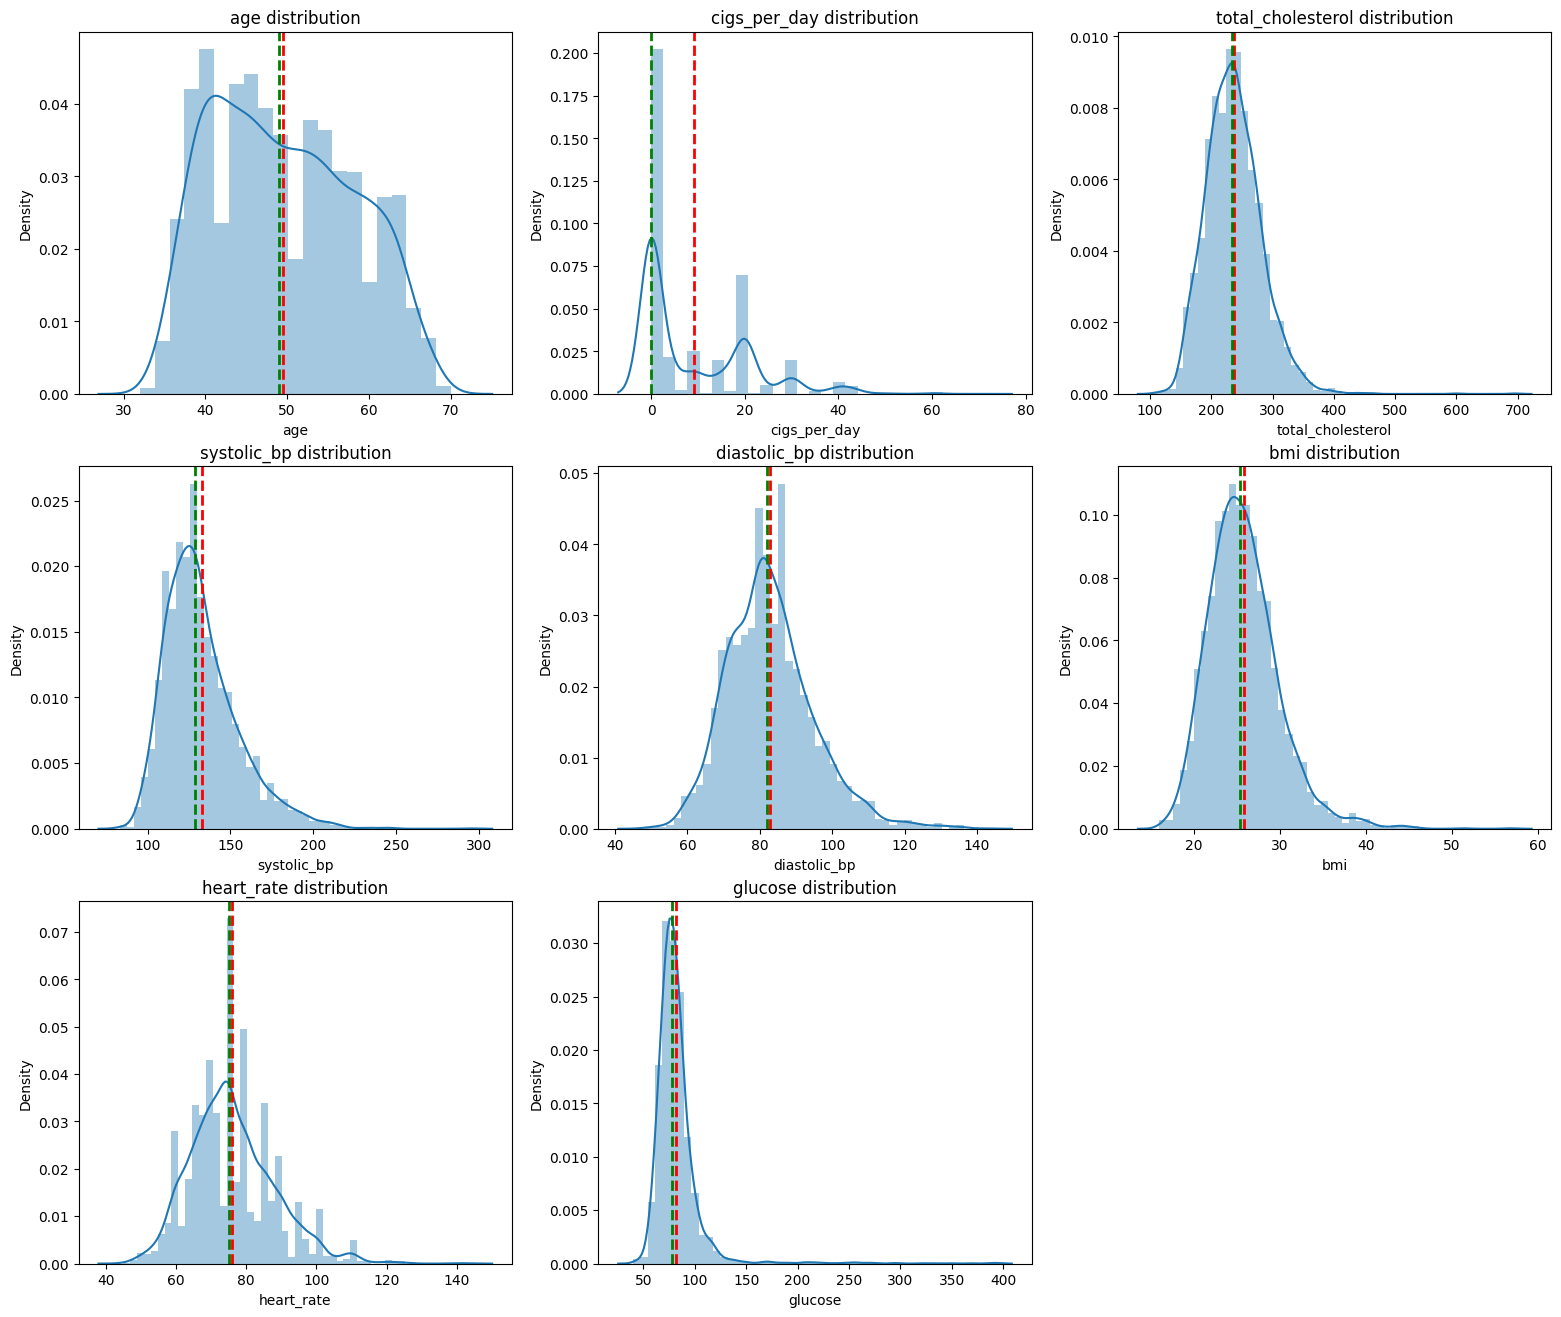

In [23]:
# dist plot for visulization of data distribution in continuous variable
plt.figure(figsize = (19,16))
for i, n in enumerate(cont_var):
  plt.subplot(3,3,i+1)
  sns.distplot(df[n])
  plt.axvline(df[n].mean(),color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(df[n].median(),color = 'green', linestyle = 'dashed', linewidth = 2)
  plt.title(n+" distribution")

Based on the information provided by the distribution plots, we can draw the following conclusions:

* The **majority of patients** fall into the age group around **40 years**.
* Patients who smoke cigarettes have an **average consumption of 10 cigarettes per day.**
* The **cholesterol levels** of patients range from 100 to 400, with an **average value of approximately 250.**
* **Systolic blood pressure** of patients mainly ranges from 100 to 200, with an **average of 130.**
* **Diastolic blood pressure** ranges mainly from 60 to 120, with an **average around 85**.
* **BMI (Body Mass Index)** typically ranges from 20 to 40, with an **average of 25.**
* **Heart rate** ranges from 40 to 120, with an **average of 75**.
* **Glucose levelsange from 50 to 150, with an **average around 80**, while the remaining values appear to be outliers.

#### **Checking outliers**

<Axes: >

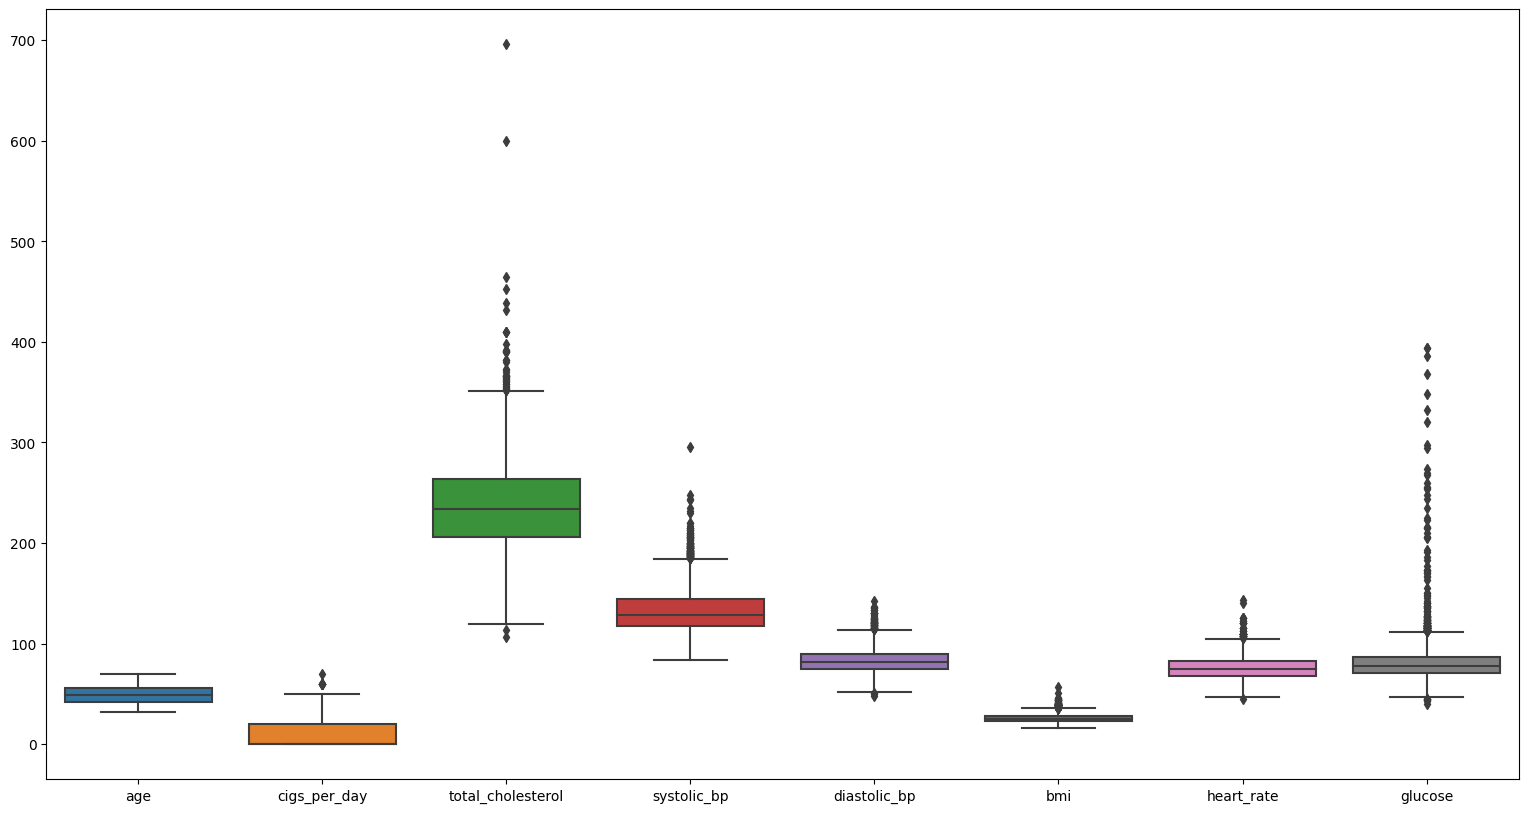

In [24]:
# box plot for checking outliers in continuous variables
plt.figure(figsize = (19,10))
sns.boxplot(df[cont_var])

We can see all the columns have otliers except age column, which need to be treated before data modeling.

### **Dependent variable**

**Distribution of the dependent variable:**

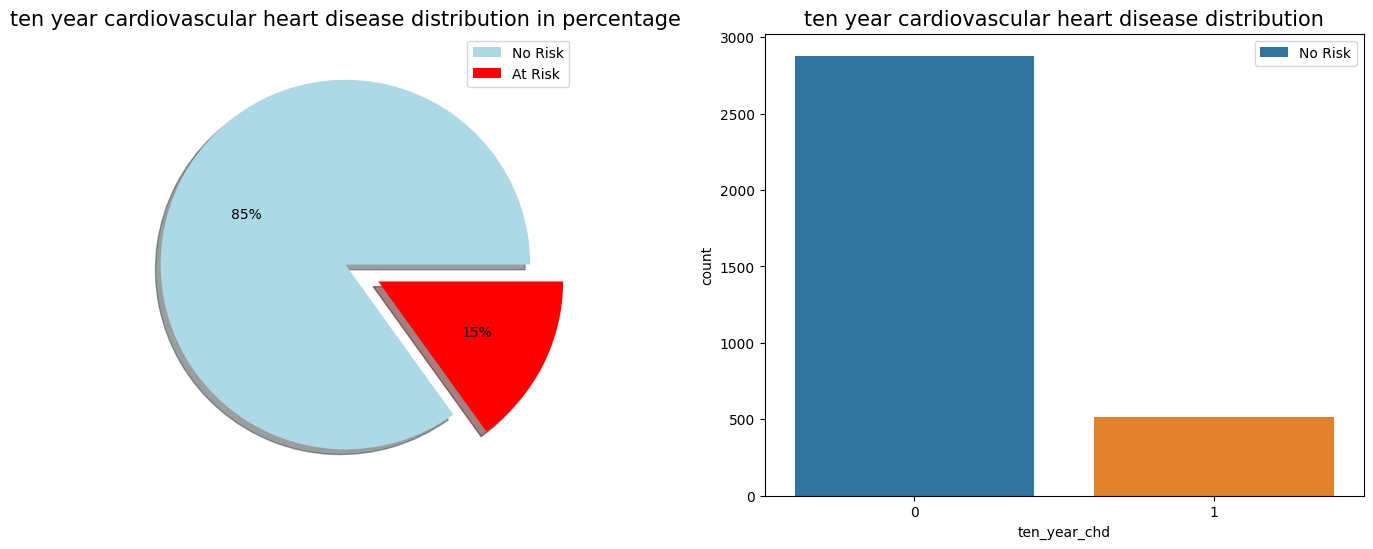

In [25]:
# pie chart and count plot for dependent variable
plt.figure(figsize = (17,6))

plt.subplot(1,2,1)
data = df['ten_year_chd'].value_counts()
plt.pie(data, explode = [0,0.2], autopct='%.0f%%', shadow=True, colors = ['lightblue','red'])
plt.title('ten year cardiovascular heart disease distribution in percentage',fontsize =15)
plt.legend(['No Risk','At Risk'])

plt.subplot(1,2,2)
sns.countplot(data = df, x= 'ten_year_chd')
plt.title('ten year cardiovascular heart disease distribution',fontsize =15)
plt.legend(['No Risk','At Risk'])
plt.show()

* **15% of the patients** in the study were eventually **exposed to the risk of this heart disease**, rest of the patients were not exposed to this disease after the end of 10 year study.
* Here we can also see the case of **data imbalance** in dependent variable.

### **Correlation - Heatmap**

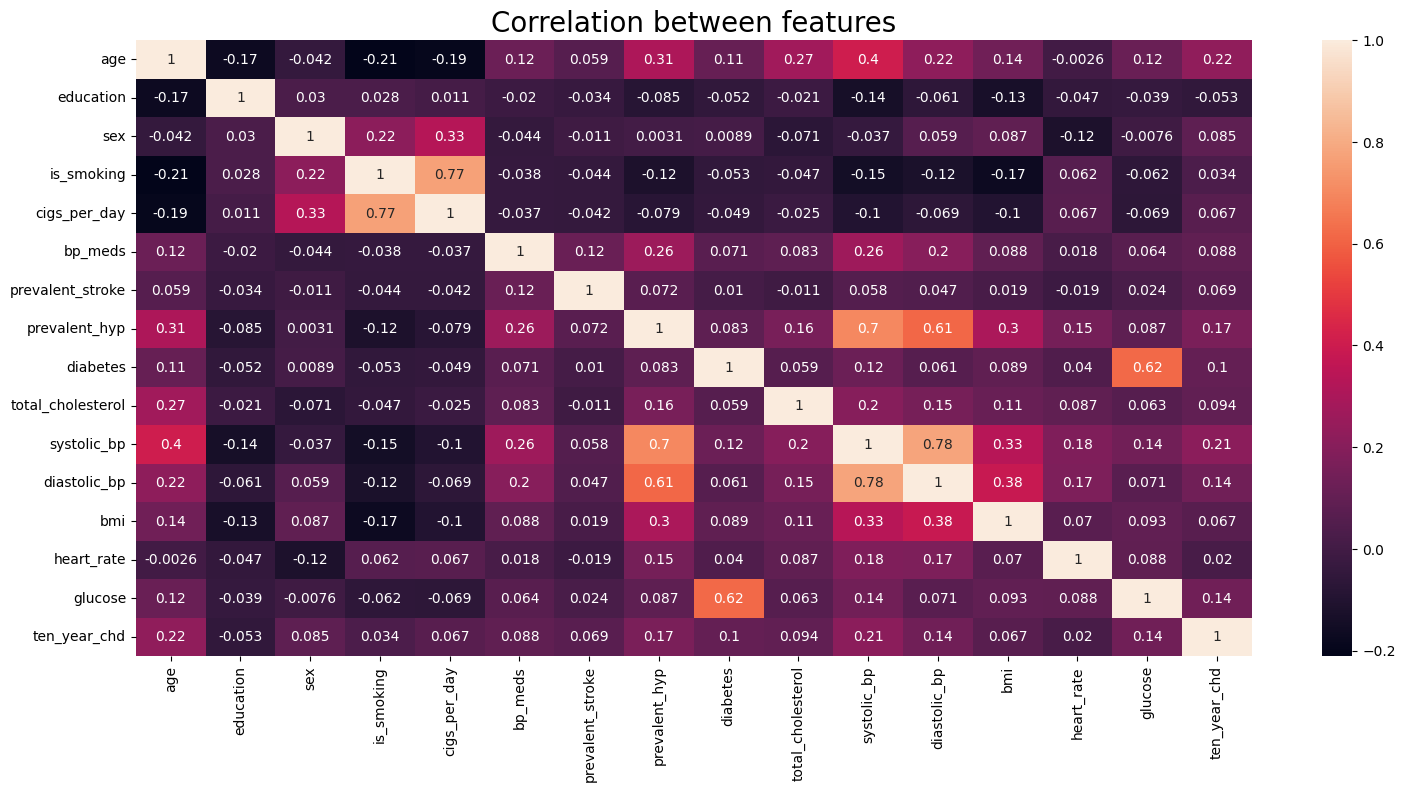

In [26]:
# checking the correlation b/w variables through heat map
plt.figure(figsize = (18,8))
df_correlation = df.corr()
sns.heatmap(df_correlation, annot = True)
plt.title('Correlation between features', fontsize = 20)
plt.show()

**We observed the following correlations in our analysis:**

* There is a **strong positive correlation of 77% between the variables 'is_smoking' and 'cigs_per_day,**' indicating that higher cigarette consumption is associated with a higher likelihood of being a smoker.

* The variables **'systolic_bp' and 'diastolic_bp' are positively correlated with a coefficient of 78%**, suggesting that an increase in one of these blood pressure components tends to be associated with an increase in the other.

* Furthermore, we noticed that both **systolic and diastolic blood pressure have an impact on hypertension**, indicating that changes in these blood pressure values may contribute to the development or management of hypertension

## ***6. Feature Engineering & Data Pre-processing***

### **1. Creating copying of Datasets**

In [27]:
copy_df = df.copy()

In [28]:
copy_df.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0   64        2.0    0           1           3.0      0.0                 0   
1   36        4.0    1           0           0.0      0.0                 0   
2   46        1.0    0           1          10.0      0.0                 0   
3   50        1.0    1           1          20.0      0.0                 0   
4   64        1.0    0           1          30.0      0.0                 0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0              0         0              221.0        148.0          85.0   
1              1         0              212.0        168.0          98.0   
2              0         0              250.0        116.0          71.0   
3              1         0              233.0        158.0          88.0   
4              0         0              241.0        136.5          85.0   

     bmi  heart_rate  glucose  ten_year_chd  
0    NaN        90.0     80.0             1  
1  29.77        72.0     75.0             0  
2  20.35        88.0     94.0             0  
3  28.26        68.0     94.0             1  
4  26.42        70.0     77.0             0

### **2. Handling Missing Values**

In [29]:
# Handling Missing Values & Missing Value Imputation
copy_df.isnull().sum()/len(copy_df) * 100

age                  0.000000
education            2.566372
sex                  0.000000
is_smoking           0.000000
cigs_per_day         0.648968
bp_meds              1.297935
prevalent_stroke     0.000000
prevalent_hyp        0.000000
diabetes             0.000000
total_cholesterol    1.120944
systolic_bp          0.000000
diastolic_bp         0.000000
bmi                  0.412979
heart_rate           0.029499
glucose              8.967552
ten_year_chd         0.000000
dtype: float64

In [31]:
# education and bp_meds are categorical columns - replacing missing value with mode
copy_df['education'].fillna(copy_df['education'].mode()[0], inplace = True)
copy_df['bp_meds'].fillna(copy_df['bp_meds'].mode()[0], inplace = True)

In [32]:
# checking if there any record where is_smoking = 0 and cigs_per_day is null value
copy_df[(copy_df['is_smoking'] == 0) & (copy_df['cigs_per_day'].isnull())]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [33]:
# checking if there any record where is_smoking = 1 and cigs_per_day = 0
copy_df[(copy_df['is_smoking'] == 1) & (copy_df['cigs_per_day'] == 0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [34]:
# checking if there any record where is_smoking = 1 and cigs_per_day is greater then 0
copy_df[(copy_df['is_smoking'] == 0) & (copy_df['cigs_per_day'] > 0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [35]:
# checking mean and median of cig/day for patients who smoke
copy_df[copy_df['is_smoking'] == 1]['cigs_per_day'].mean(), copy_df[copy_df['is_smoking'] == 1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

In [36]:
# replacing all null value of cig/day with median
copy_df['cigs_per_day'].fillna(copy_df[copy_df['is_smoking'] ==1]['cigs_per_day'].median(), inplace = True)

In [37]:
# Replacing null values of total_cholesterol, bmi, heart_rate, glucose columns with the KNNImputer with k = 10
imputer = KNNImputer(n_neighbors = 10)
imputed = imputer.fit_transform(copy_df)
copy_df = pd.DataFrame(imputed,columns =copy_df.columns)

In [38]:
# checking null values - after treating missing values
copy_df.isnull().sum()/len(copy_df) * 100

age                  0.0
education            0.0
sex                  0.0
is_smoking           0.0
cigs_per_day         0.0
bp_meds              0.0
prevalent_stroke     0.0
prevalent_hyp        0.0
diabetes             0.0
total_cholesterol    0.0
systolic_bp          0.0
diastolic_bp         0.0
bmi                  0.0
heart_rate           0.0
glucose              0.0
ten_year_chd         0.0
dtype: float64

In [39]:
# changing datatypes
copy_df = copy_df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

### **3. Handling Outliers**

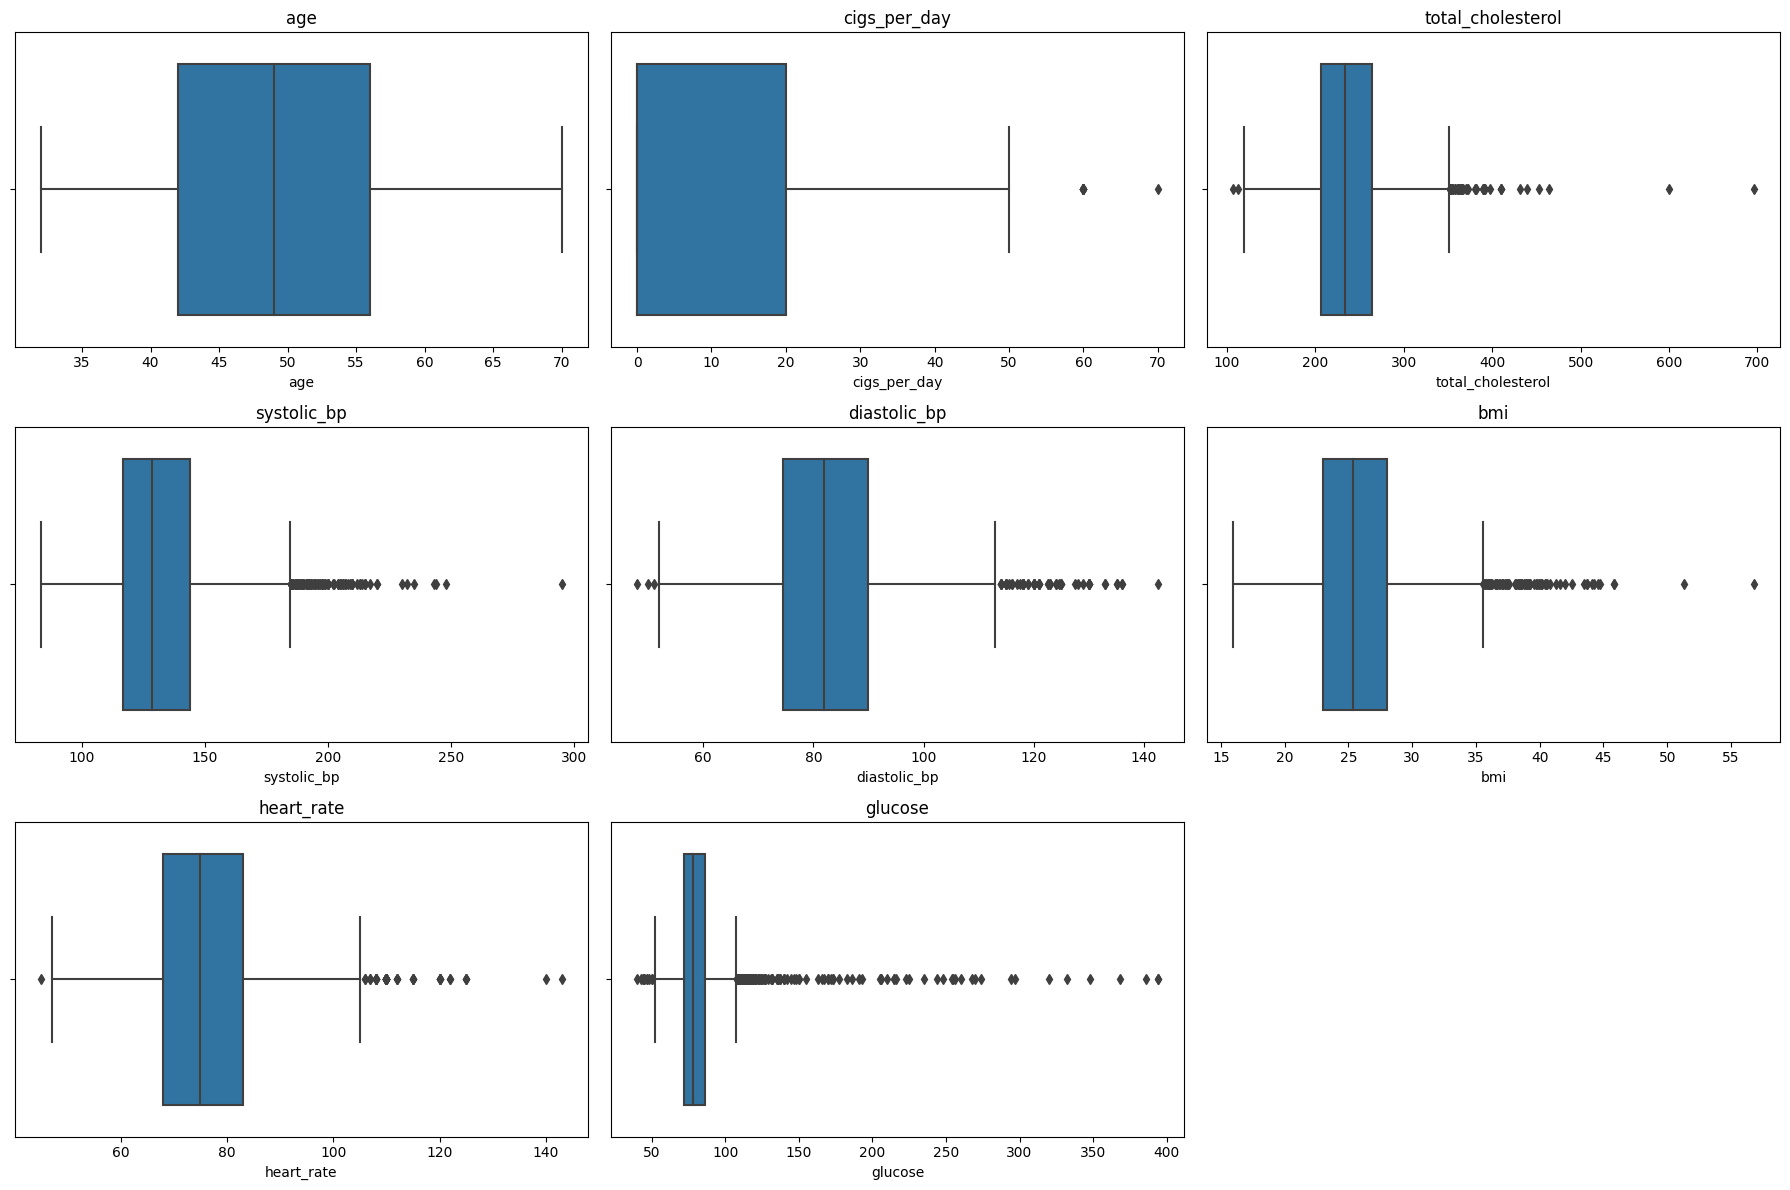

In [40]:
# checking outliers
plt.figure(figsize = (18,12))
for i, n in enumerate(cont_var):
  plt.subplot(3,3,i+1)
  sns.boxplot(x = copy_df[n])
  plt.title(n)
plt.tight_layout()

* **outliers are crucial and cannot be removed** since they might indicate high-risk cases of Coronary Heart Disease (CHD).
* If the outliers in this particular case are removed, **it would cause removal of many rows with possible risk of CHD.**
* In this scenario, it is known that **people with extreme values of Cholestrol, BP, Glucose, BMI etc. are prone to heart diseases**. Hence, removal of higher numbers is not considered.
* **This would further affect the machine learning model.**
* **In this scenario** we can remove the borderline outliers, **We'll try to be considerate and only drop values that do not make any sense** or unlikely to occur.

In [42]:
for col in cont_var:
  # Using IQR method to define the range of inliners:
  q1, q3, median = copy_df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  copy_df[col] = np.where(copy_df[col] > upper_limit, median,np.where(
                         copy_df[col] < lower_limit,median,copy_df[col]))


In [43]:
copy_df.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

<Axes: >

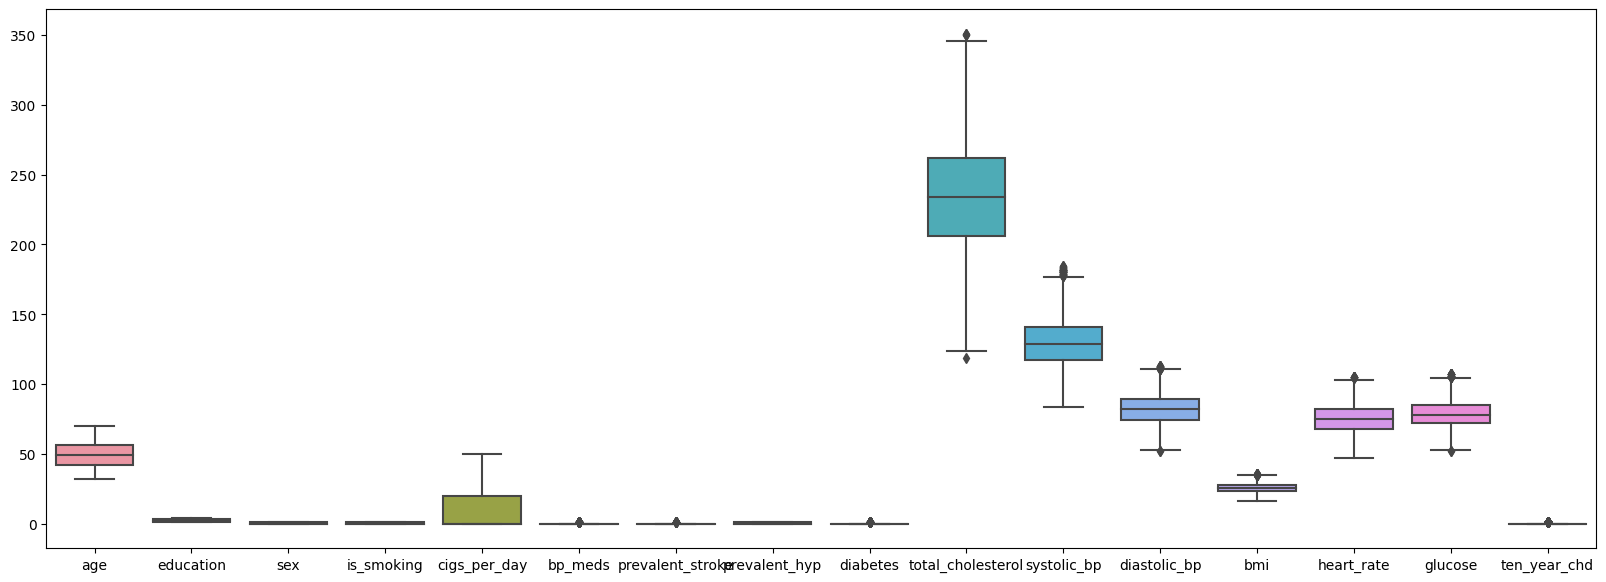

In [44]:
# After removing some outliers
plt.figure(figsize = (20,7))
sns.boxplot(copy_df)

### **4. Data Transformation**

In [45]:
# Checking the skewness
copy_df[cont_var].skew(axis = 0)

age                  0.225796
cigs_per_day         1.097163
total_cholesterol    0.234464
systolic_bp          0.590111
diastolic_bp         0.299948
bmi                  0.284140
heart_rate           0.287271
glucose              0.300101
dtype: float64

* **Some variables are positively skew we try to reduce their skewness through log10 and sqrt.**

In [46]:
# Implementing log transformation and sqrt on variables having skewness greater then 0.5
copy_df['cigs_per_day'] = np.sqrt(copy_df['cigs_per_day'])

"copy_df['cigs_per_day'] = np.sqrt(copy_df['cigs_per_day'])\ncopy_df['systolic_bp'] = np.log10(copy_df['systolic_bp'])\ncopy_df['bmi'] = np.log10(copy_df['bmi'])\ncopy_df['heart_rate'] = np.log10(copy_df['heart_rate'])\ncopy_df['glucose'] = np.log10(copy_df['glucose'])\ncopy_df['diastolic_bp'] = np.log10(copy_df['diastolic_bp'])"

In [47]:
copy_df[cont_var].skew(axis = 0)

age                  0.225796
cigs_per_day         0.449861
total_cholesterol    0.234464
systolic_bp          0.590111
diastolic_bp         0.299948
bmi                  0.284140
heart_rate           0.287271
glucose              0.300101
dtype: float64

### **5. Feature Selection**

#### **Handling Multicollinearity using VIF**

In [48]:
# importing liberay for variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a function to calcualte VIF

def VIF(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [49]:
# checking VIF Value
VIF(copy_df)

Columns         VIF
0                 age   43.823143
1           education    4.645549
2                 sex    2.155436
3          is_smoking   11.317984
4        cigs_per_day   10.922894
5             bp_meds    1.129952
6    prevalent_stroke    1.029341
7       prevalent_hyp    2.359181
8            diabetes    1.053682
9   total_cholesterol   37.690584
10        systolic_bp  132.856111
11       diastolic_bp  126.779412
12                bmi   58.488429
13         heart_rate   48.088886
14            glucose   52.286158
15       ten_year_chd    1.284151

* The Heatmap revealed a **strong positive correlation between systolic_bp diastolic_bp.**
* **Both variables also exhibit high VIF** (Variance Inflation Factor) values, indicating multicollinearity. Therefore, to address this issue, **we will drop them since it has the higher VIF value.**

In [50]:
# dropping systolic_bp column
copy_df.drop(columns = ['systolic_bp','diastolic_bp'], inplace = True)
cont_var.remove('systolic_bp')
cont_var.remove('diastolic_bp')

In [51]:
VIF(copy_df)

Columns        VIF
0                 age  39.188759
1           education   4.583755
2                 sex   2.128542
3          is_smoking  11.315287
4        cigs_per_day  10.921572
5             bp_meds   1.128994
6    prevalent_stroke   1.028067
7       prevalent_hyp   1.744630
8            diabetes   1.053129
9   total_cholesterol  36.613767
10                bmi  49.664180
11         heart_rate  43.586566
12            glucose  49.553490
13       ten_year_chd   1.281967

* Is_smoking and cigs_per_day are also highly positive correlated so we will drop IS_smoking col as cig_per_day col already have the information about smoker and non smoker.

In [52]:
# dropping is_smoking col
copy_df.drop(columns = 'is_smoking', inplace =True)
cat_var.remove('is_smoking')

In [53]:
VIF(copy_df)

Columns        VIF
0                 age  39.157330
1           education   4.577744
2                 sex   2.103342
3        cigs_per_day   2.157492
4             bp_meds   1.128949
5    prevalent_stroke   1.028052
6       prevalent_hyp   1.741876
7            diabetes   1.053065
8   total_cholesterol  36.606563
9                 bmi  49.615657
10         heart_rate  43.519364
11            glucose  49.443748
12       ten_year_chd   1.281531

In [54]:
# dropping glucose and bmi col
copy_df.drop(columns = 'glucose', inplace = True)
cont_var.remove('glucose')


In [55]:
VIF(copy_df)

Columns        VIF
0                 age  35.926908
1           education   4.487184
2                 sex   2.103339
3        cigs_per_day   2.156209
4             bp_meds   1.127425
5    prevalent_stroke   1.028052
6       prevalent_hyp   1.722950
7            diabetes   1.052008
8   total_cholesterol  36.225973
9                 bmi  45.105927
10         heart_rate  38.261145
11       ten_year_chd   1.280135

In [56]:
copy_df.head()

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0  64.0          2    0      1.732051        0                 0   
1  36.0          4    1      0.000000        0                 0   
2  46.0          1    0      3.162278        0                 0   
3  50.0          1    1      4.472136        0                 0   
4  64.0          1    0      5.477226        0                 0   

   prevalent_hyp  diabetes  total_cholesterol     bmi  heart_rate  \
0              0         0              221.0  27.146        90.0   
1              1         0              212.0  29.770        72.0   
2              0         0              250.0  20.350        88.0   
3              1         0              233.0  28.260        68.0   
4              0         0              241.0  26.420        70.0   

   ten_year_chd  
0             1  
1             0  
2             0  
3             1  
4             0

### **6. Data Splitting**

In [57]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = copy_df.drop(columns = 'ten_year_chd')
y = copy_df['ten_year_chd']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y, shuffle=True)

In [58]:
# checking the value count and proportion of class in y_train
print('Value Count: \n' , y_train.value_counts())
print('Proportion: \n', 409/(409+2303))

Value Count: 
 0    2303
1     409
Name: ten_year_chd, dtype: int64
Proportion: 
 0.15081120943952803


In [59]:
# checking the value count and proportion of class in y_test
print('Value Count: \n' , y_test.value_counts())
print('Proportion: \n', 102/(102+576))

Value Count: 
 0    576
1    102
Name: ten_year_chd, dtype: int64
Proportion: 
 0.1504424778761062


### **7. Handling Imbalanced Dataset**

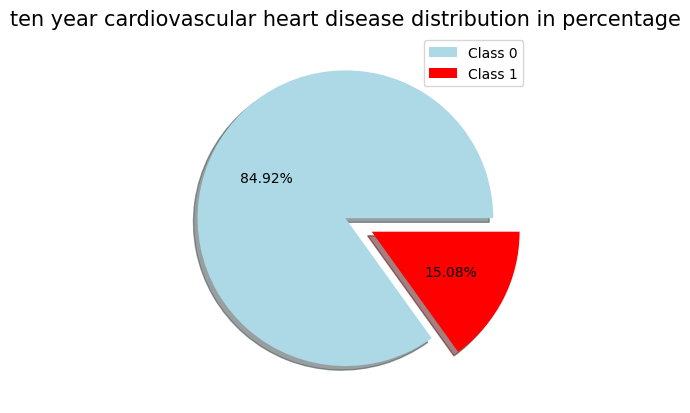

In [60]:
# checking the overall proportion of data in training dataset
data1 = y_train.value_counts()
plt.pie(data1, explode = [0,0.2], autopct='%0.2f%%', shadow=True, colors = ['lightblue','red'])
plt.title('ten year cardiovascular heart disease distribution in percentage',fontsize =15)
plt.legend(['Class 0','Class 1'])
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Yes, Datasets imbalance as there is only 15% of class 1 data is present for in our training dataset

In [61]:
# Handling Imbalanced Dataset from SMOTE
x_smote, y_smote = SMOTE(random_state = 3).fit_resample(x_train, y_train)

print('Original training dataset count: \n', y.value_counts())
print('Resampled training dataset count: \n', y_smote.value_counts())


Original training dataset count: 
 0    2879
1     511
Name: ten_year_chd, dtype: int64
Resampled training dataset count: 
 0    2303
1    2303
Name: ten_year_chd, dtype: int64


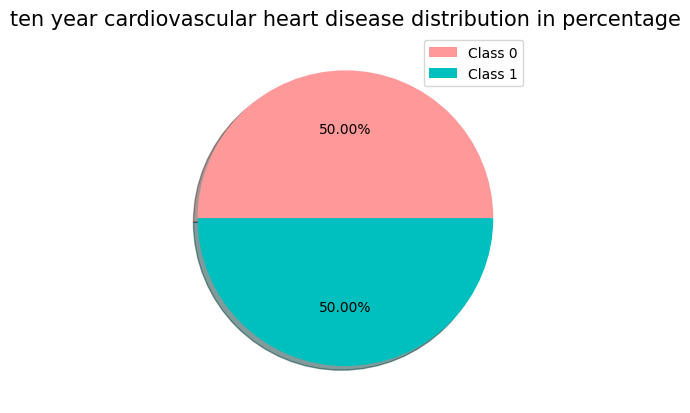

In [62]:
# checking the overall proportion of data in training dataset - after handling data imbalance
data2 = y_smote.value_counts()
plt.pie(data2, autopct='%0.2f%%', shadow=True, colors = ['#ff9999','c'])
plt.title('ten year cardiovascular heart disease distribution in percentage',fontsize =15)
plt.legend(['Class 0','Class 1'])
plt.show()

### **8. Data Scaling**

In [63]:
# Scaling your data
scalar = StandardScaler()

x_smote[cont_var] = scalar.fit_transform(x_smote[cont_var])
x_test[cont_var] = scalar.transform(x_test[cont_var])

x_train_sc = pd.DataFrame(x_smote, columns = x_train.columns)
x_test_sc = pd.DataFrame(x_test, columns = x_test.columns)


In [64]:
x_train_sc

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0    -1.353929          2    0     -0.973789        0                 0   
1    -1.471215          2    0      1.105357        0                 0   
2    -0.767501          3    1      1.966568        0                 0   
3    -0.767501          4    0     -0.973789        0                 0   
4    -1.471215          2    1      1.105357        0                 0   
...        ...        ...  ...           ...      ...               ...   
4601  1.473557          1    0     -0.973789        0                 0   
4602 -1.385750          1    1      1.601612        0                 0   
4603 -1.353929          1    1      1.341376        0                 0   
4604  0.303117          1    0      0.626516        0                 0   
4605  1.089690          1    1      1.004743        0                 0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  
0                 0         0          -0.489643 -1.767020   -0.347285  
1                 0         0          -0.804357 -1.761051    0.420328  
2                 0         0           0.938679 -0.570344   -0.059430  
3                 0         0          -0.465434 -0.006324   -0.059430  
4                 0         0          -0.659104  0.515916    1.091990  
...             ...       ...                ...       ...         ...  
4601              0         0          -0.716648 -0.221644    0.394493  
4602              0         0           0.431107  0.598841    0.143877  
4603              0         0           1.100979 -0.415305    0.537125  
4604              0         0          -0.304541 -1.634896    1.423151  
4605              1         0          -0.477433 -0.293381    1.619309  

[4606 rows x 11 columns]

In [65]:
x_test_sc

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
829   1.226354          2    0     -0.973789        1                 0   
969  -1.823071          4    1      1.572635        0                 0   
967  -1.588500          2    0     -0.973789        0                 0   
632   0.053498          1    1     -0.973789        0                 0   
2606  0.991783          3    1     -0.973789        0                 0   
...        ...        ...  ...           ...      ...               ...   
2094 -0.532930          1    1      1.105357        0                 0   
3263 -0.767501          3    0      1.105357        0                 0   
2589  0.170784          2    1     -0.973789        0                 0   
43   -0.650215          1    0     -0.973789        0                 0   
237  -1.471215          1    1      1.572635        0                 0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  
829               1         0           1.422856 -0.095851    1.955556  
969               0         0          -2.039008 -0.167473   -2.458223  
967               0         0          -0.295972  1.354485    0.900087  
632               1         0          -1.675876  1.088888    1.475797  
2606              1         0           0.890261  0.381626   -1.498706  
...             ...       ...                ...       ...         ...  
2094              1         0           1.229185  0.506963    1.955556  
3263              0         0          -0.998028 -1.050805    0.228425  
2589              0         0           0.866053  0.611411   -0.827044  
43                0         0          -0.755940 -2.178843   -0.059430  
237               0         0          -1.046446 -0.095851    1.379846  

[678 rows x 11 columns]

### **8. Creating Functions for checking performance of model**

In [66]:
# function for evolution matrice
def matrix(model,x_train,x_test,y_train,y_test):

  # train pediction
  train_pred = model.predict(x_train)

  # test prediction
  test_pred = model.predict(x_test)


  # creating dataframe to store value of matrix
  test_df = pd.DataFrame()
  train_df = pd.DataFrame()

  # calculating recall, roc_auc, f1_score for training dataset
  train_recall = round(recall_score(y_train,train_pred, average='binary'),2)
  train_roc_auc_score = round(roc_auc_score(y_train, train_pred),2)
  train_f1_score = round(f1_score(y_train, train_pred),2)

  # creating dict of all matrics values for test datasets
  train_metrics = {
              'Model': model,
              'Recall': train_recall,
              'AUC_ROC': train_roc_auc_score,
              'F1_Score': train_f1_score,
              }

   # storing the value in dataframe
  train_df = train_df.append(train_metrics, ignore_index=True)

  # calculating recall, roc_auc, f1_score for training dataset
  test_recall = round(recall_score(y_test,test_pred, average='binary'),2)
  test_roc_auc_score = round(roc_auc_score(y_test, test_pred),2)
  test_f1_score = round(f1_score(y_test, test_pred),2)

  # creating dict of all matrics values for test datasets
  test_metrics = {
              'Model': model,
              'Recall': test_recall,
              'AUC_ROC': test_roc_auc_score,
              'F1_Score': test_f1_score,
              }

  # storing the value in dataframe
  test_df = test_df.append(test_metrics, ignore_index=True)

  # concatenating both the dataframe in single dataframe
  result=pd.concat([train_df,test_df],keys=['Training set','Test set'])

  return result

In [67]:
# function for getting confusion matrix and classification report
def confusion_classification(model,x_train,x_test,y_train,y_test):

  # test prediction
  y_pred_te = model.predict(x_test)

  # classification report
  print(classification_report(y_test,y_pred_te))

  # confusion matrix
  confusion_matrix = cm(y_test, y_pred_te)
  cm_display = cmd(confusion_matrix = confusion_matrix, display_labels = [False, True])

  # visualization of confusion matrix
  cm_display.plot(cmap='Blues')
  plt.title(f'Confusion matrix: {model}')
  plt.show();

## ***7. ML Model Implementation***

### **Logistic Regression**

In [68]:
# training the model
lr = LogisticRegression().fit(x_train_sc,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# get the value of matrics for train and test datasets
lr_score = matrix(lr,x_train_sc,x_test_sc,y_smote,y_test)
lr_score

Model  Recall  AUC_ROC  F1_Score
Training set 0  LogisticRegression()    0.69     0.67      0.68
Test set     0  LogisticRegression()    0.59     0.64      0.36

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       576
           1       0.26      0.59      0.36       102

    accuracy                           0.68       678
   macro avg       0.58      0.64      0.57       678
weighted avg       0.81      0.68      0.73       678



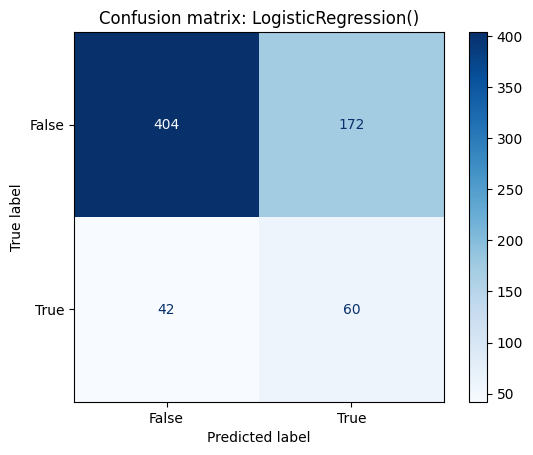

In [70]:
# classification report and Visulization of confusion matrix
confusion_classification(lr,x_train_sc,x_test_sc,y_smote,y_test)


* **Recall Score for train dataset** - 69%
* **Recall Score for test dataset** - 59%
* **AUC_ROC Score for train dataset** - 67%
* **AUC_ROC Score for test dataset** - 64%
* **F1_Score for train dataset** - 68%
* **F1_Score for test dataset** - 36%
* **False Negative** - 42
* **True Positive** - 60

### **Decision Tree with GridSearchCV**

In [71]:
# Using stratified k fold cross validation so that each split has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=0)

In [72]:
DecisionTree = DecisionTreeClassifier()

# dt_model hyperparameters
dt_params = {'max_depth':np.arange(1,10), 'min_samples_split':np.arange(0.1,1,0.1),'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [73]:
# Using gridsearchcv to find best hyperparameters value
dtcv = GridSearchCV(DecisionTree,dt_params,cv = cv_method, scoring = 'recall').fit(x_train_sc,y_smote)

# Checking the best values of hyperparameter
dtcv.best_params_

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# get the value of matrics for train and test datasets
dt_score = matrix(dtcv,x_train_sc,x_test_sc,y_smote,y_test)
dt_score

Model  Recall  \
Training set 0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...    0.82   
Test set     0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...    0.81   

                AUC_ROC  F1_Score  
Training set 0     0.63      0.69  
Test set     0     0.66      0.36

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       576
           1       0.23      0.81      0.36       102

    accuracy                           0.56       678
   macro avg       0.58      0.66      0.51       678
weighted avg       0.83      0.56      0.62       678



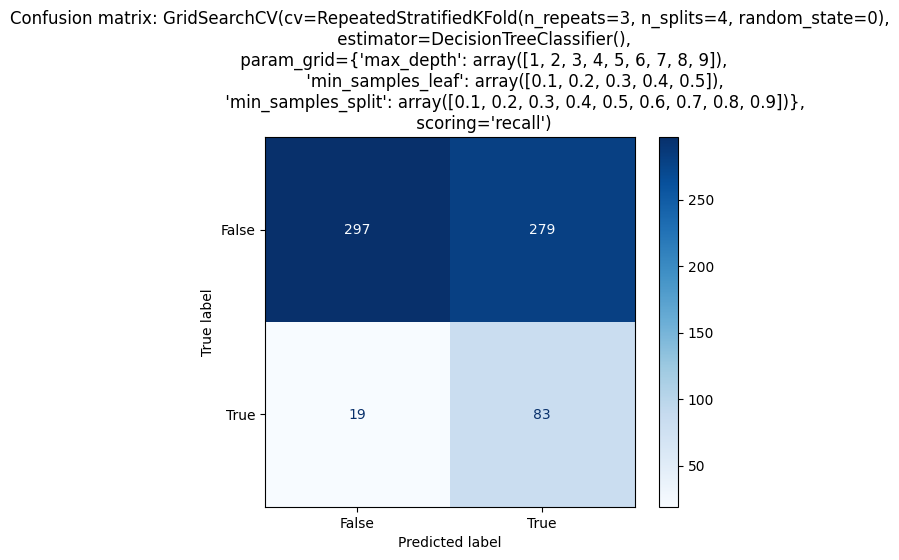

In [75]:
# classification report and Visulization of confusion matrix
confusion_classification(dtcv,x_train_sc,x_test_sc,y_smote,y_test)

* **Recall Score for train dataset** - 82%
* **Recall Score for test dataset** - 81%
* **AUC_ROC Score for train dataset** - 63%
* **AUC_ROC Score for test dataset** - 66%
* **F1_Score for train dataset** - 69%
* **F1_Score for test dataset** - 36%
* **False Negative** - 19
* **True Positive** - 83

### **Random Forest with GridSearchCV**

In [76]:
# random forest model
RAMDOMFOREST = RandomForestClassifier(random_state=0)

#  rf_model hyperparameters
rf_params = {'n_estimators':[50], 'max_depth':np.arange(3,6), 'min_samples_split':np.arange(0.1,1,0.2), 'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [77]:
# using gridsearchcv to find best hyperparameters values
rfcv = GridSearchCV(RAMDOMFOREST,rf_params,cv=cv_method,scoring='recall').fit(x_train_sc, y_smote)

# Checking the best values of hyperparameter
rfcv.best_params_


{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.7000000000000001,
 'n_estimators': 50}

In [78]:
# get the value of matrics for train and test datasets
rf_score = matrix(rfcv,x_train_sc,x_test_sc,y_smote,y_test)
rf_score

Model  Recall  \
Training set 0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...     1.0   
Test set     0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...     1.0   

                AUC_ROC  F1_Score  
Training set 0      0.5      0.67  
Test set     0      0.5      0.26

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       576
           1       0.15      1.00      0.26       102

    accuracy                           0.15       678
   macro avg       0.08      0.50      0.13       678
weighted avg       0.02      0.15      0.04       678



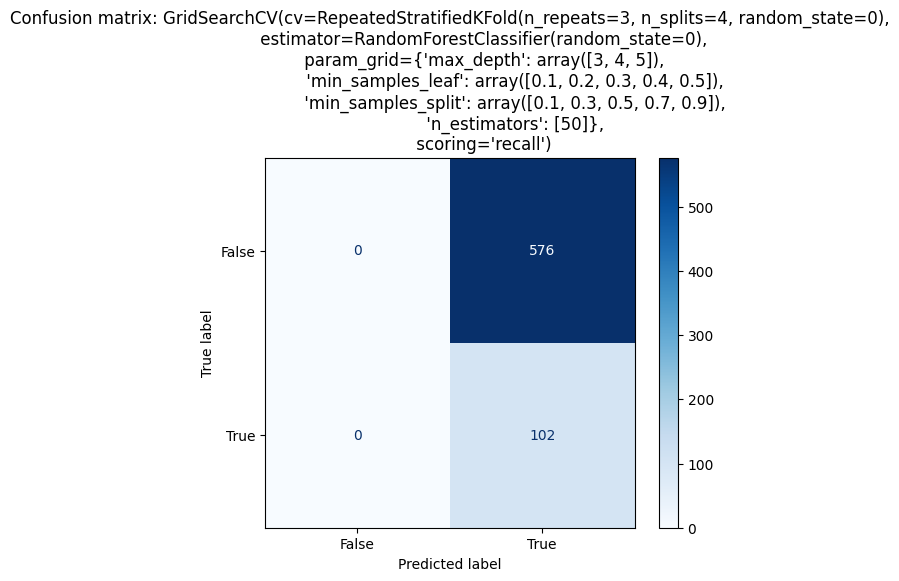

In [79]:
# classification report and Visulization of confusion matrix
confusion_classification(rfcv,x_train_sc,x_test_sc,y_smote,y_test)

* **Recall Score for train dataset** - 100%
* **Recall Score for test dataset** - 100%
* **AUC_ROC Score for train dataset** - 50%
* **AUC_ROC Score for test dataset** - 50%
* **F1_Score for train dataset** - 67%
* **F1_Score for test dataset** - 26%
* **False Negative** - 0
* **True Positive** - 102

### **XGBOOST Classifier**

In [80]:
# Fitting xgb with best parameters
XGBOOST = xgb.XGBClassifier(n_estimators=2, objective='binary:logistic',eta= 0.05,learning_rate=0.1, max_depth=1)

# training the model
XGBOOST.fit(x_train_sc,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [81]:
# get the value of matrics for train and test datasets
xgb_score = matrix(XGBOOST,x_train_sc,x_test_sc,y_smote,y_test)
xgb_score

Model  Recall  \
Training set 0  XGBClassifier(base_score=None, booster=None, c...    0.82   
Test set     0  XGBClassifier(base_score=None, booster=None, c...    0.81   

                AUC_ROC  F1_Score  
Training set 0     0.63      0.69  
Test set     0     0.66      0.36

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       576
           1       0.23      0.81      0.36       102

    accuracy                           0.56       678
   macro avg       0.58      0.66      0.51       678
weighted avg       0.83      0.56      0.62       678



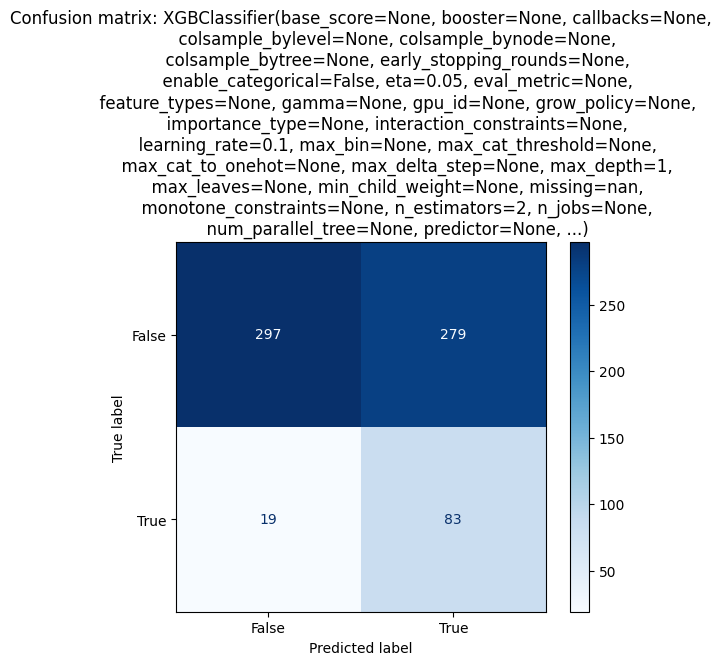

In [82]:
# classification report and Visulization of confusion matrix
confusion_classification(XGBOOST,x_train_sc,x_test_sc,y_smote,y_test)

* **Recall Score for train dataset** - 82%
* **Recall Score for test dataset** - 81%
* **AUC_ROC Score for train dataset** - 63%
* **AUC_ROC Score for test dataset** - 66%
* **F1_Score for train dataset** - 69%
* **F1_Score for test dataset** - 36%
* **False Negative** - 19
* **True Positive** - 83

### **KNN**

In [83]:
# geting the recall score for different value of K to check which will be best fit.

neighbors = range(1,120)
train_recall = []
test_recall = []

for i in neighbors:
  KNN = KNeighborsClassifier(n_neighbors = i).fit(x_train_sc, y_smote)
  y_train_pred = KNN.predict(x_train_sc)
  recall_train = recall_score(y_smote,y_train_pred,average = 'binary')

  y_test_pred = KNN.predict(x_test_sc)
  recall_test = recall_score(y_test,y_test_pred, average = 'binary')

  train_recall.append(recall_train)
  test_recall.append(recall_test)

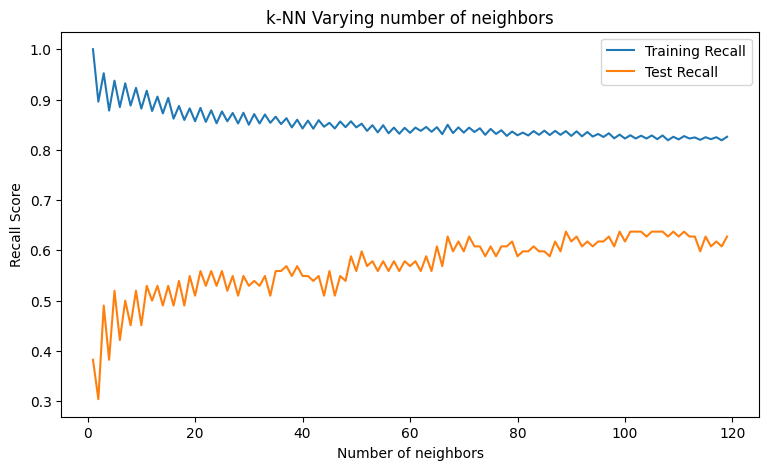

In [84]:
# ploting a graph of training and test recall score
plt.figure(figsize = (9,5))
plt.plot(neighbors,train_recall, label = 'Training Recall')
plt.plot(neighbors,test_recall,label = 'Test Recall')
plt.legend()
plt.title('k-NN Varying number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Recall Score')
plt.show()

In [85]:
# checking the best value of K
K_best_value = test_recall.index(max(test_recall))+1
K_best_value

89

In [86]:
# training the model
KNN = KNeighborsClassifier(n_neighbors = K_best_value).fit(x_train_sc, y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [87]:
# get the value of matrics for train and test datasets
knn_score = matrix(KNN,x_train_sc,x_test_sc,y_smote,y_test)
knn_score

Model  Recall  AUC_ROC  \
Training set 0  KNeighborsClassifier(n_neighbors=89)    0.84     0.70   
Test set     0  KNeighborsClassifier(n_neighbors=89)    0.64     0.62   

                F1_Score  
Training set 0      0.74  
Test set     0      0.33

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       576
           1       0.22      0.64      0.33       102

    accuracy                           0.61       678
   macro avg       0.56      0.62      0.52       678
weighted avg       0.80      0.61      0.66       678



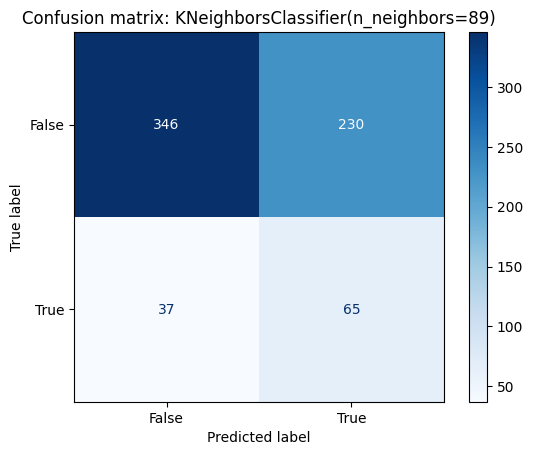

In [88]:
# classification report and Visulization of confusion matrix
confusion_classification(KNN,x_train_sc,x_test_sc,y_smote,y_test)

* **Recall Score for train dataset** - 84%
* **Recall Score for test dataset** - 64%
* **AUC_ROC Score for train dataset** - 70%
* **AUC_ROC Score for test dataset** - 62%
* **F1_Score for train dataset** - 74%
* **F1_Score for test dataset** - 33%
* **False Negative** - 37
* **True Positive** - 65

### **Naive Bayes with GridSearchCV**

In [89]:
NAIVEBAYES = GaussianNB()

#  nb_model hyperparameters
nb_params = {'var_smoothing': np.logspace(0,-9, num=50)}

# Using gridsearchcv to find best hyperparameters
nbcv = GridSearchCV(NAIVEBAYES, nb_params, cv=cv_method, scoring= 'recall').fit(x_train_sc,y_smote)

# Checking the best values of hyperparameter
nbcv.best_params_

{'var_smoothing': 3.0888435964774785e-06}

In [90]:
# get the value of matrics for train and test datasets
nb_score = matrix(nbcv,x_train_sc,x_test_sc,y_smote,y_test)
nb_score

Model  Recall  \
Training set 0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...    0.82   
Test set     0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...    0.63   

                AUC_ROC  F1_Score  
Training set 0     0.65       0.7  
Test set     0     0.58       0.3

              precision    recall  f1-score   support

           0       0.89      0.54      0.67       576
           1       0.19      0.63      0.30       102

    accuracy                           0.55       678
   macro avg       0.54      0.58      0.48       678
weighted avg       0.79      0.55      0.61       678



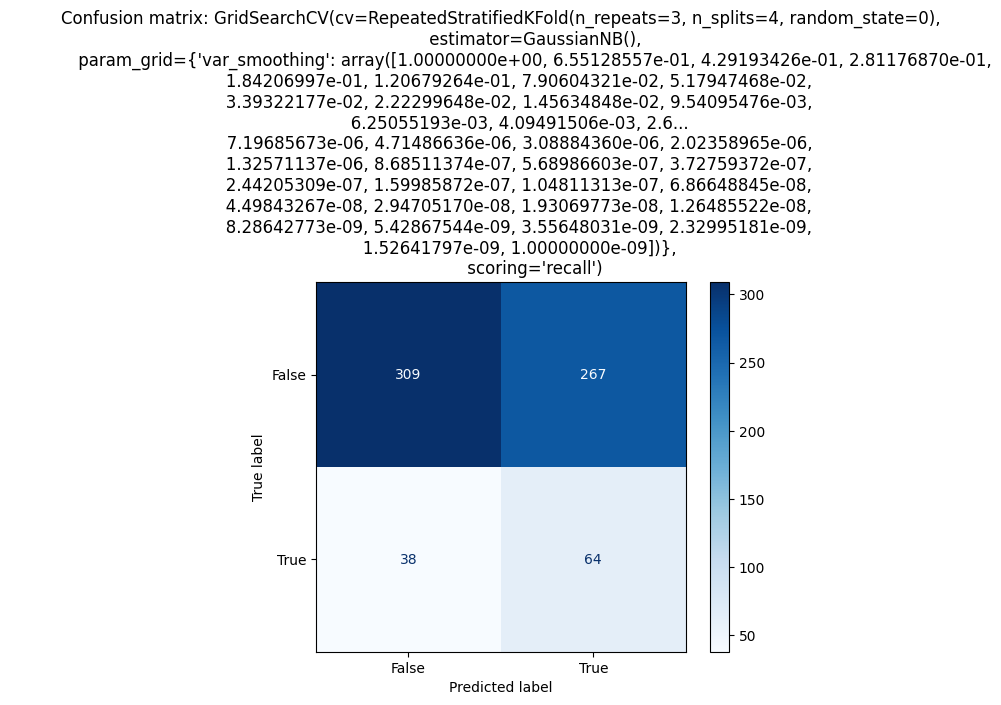

In [91]:
# classification report and Visulization of confusion matrix
confusion_classification(nbcv,x_train_sc,x_test_sc,y_smote,y_test)

* **Recall Score for train dataset** - 82%
* **Recall Score for test dataset** - 63%
* **AUC_ROC Score for train dataset** - 65%
* **AUC_ROC Score for test dataset** - 58%
* **F1_Score for train dataset** - 70%
* **F1_Score for test dataset** - 30%
* **False Negative** - 38
* **True Positive** - 64

### **Support Vector Machine with GridSearchCV**

In [92]:
# SVM model parameters
SVM = SVC()
s_params = {'C': [0.001,0.1, 1, 10], 'gamma': [0.1,0.01, 0.001, 0.0001], 'kernel': ['rbf']}

# Using gridsearchcv to find best parameters values
svmcv = GridSearchCV(SVM, s_params, cv=cv_method, scoring= 'recall').fit(x_train_sc,y_smote)

# Checking the best values of hyperparameter



In [93]:
svm_best_para = svmcv.best_params_
svm_best_para

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [94]:
svm_model = SVC(C=svm_best_para['C'],
                gamma=svm_best_para['gamma'],
                kernel=svm_best_para['kernel'],probability=True).fit(x_train_sc,y_smote)

In [95]:
# get the value of matrics for train and test datasets
svm_score = matrix(svmcv,x_train_sc,x_test_sc,y_smote,y_test)
svm_score

Model  Recall  \
Training set 0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...    0.83   
Test set     0  GridSearchCV(cv=RepeatedStratifiedKFold(n_repe...    0.79   

                AUC_ROC  F1_Score  
Training set 0     0.65      0.70  
Test set     0     0.66      0.36

              precision    recall  f1-score   support

           0       0.94      0.53      0.68       576
           1       0.23      0.79      0.36       102

    accuracy                           0.57       678
   macro avg       0.58      0.66      0.52       678
weighted avg       0.83      0.57      0.63       678



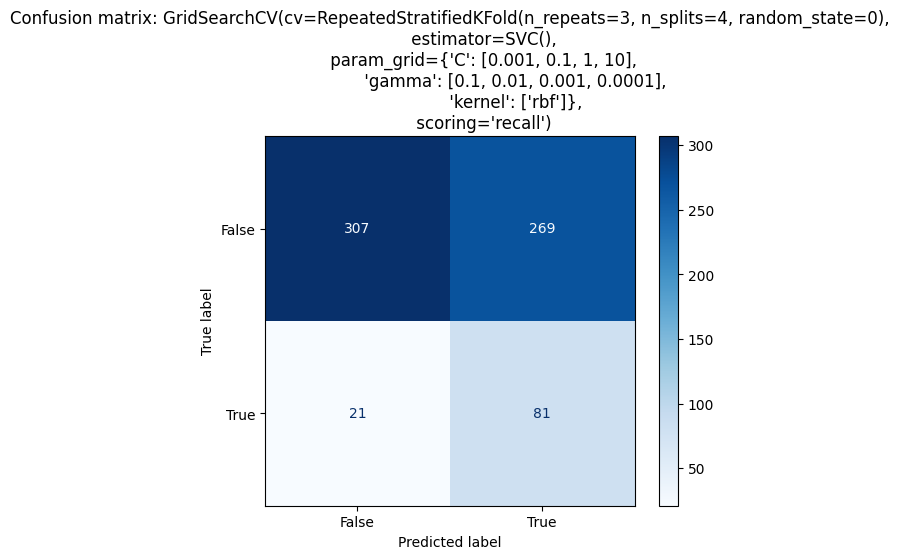

In [96]:
# classification report and Visulization of confusion matrix
confusion_classification(svmcv,x_train_sc,x_test_sc,y_smote,y_test)

* **Recall Score for train dataset** - 83%
* **Recall Score for test dataset** - 79%
* **AUC_ROC Score for train dataset** - 65%
* **AUC_ROC Score for test dataset** - 66%
* **F1_Score for train dataset** - 70%
* **F1_Score for test dataset** - 36%
* **False Negative** - 21
* **True Positive** - 81

## **Model Explainability by SHAP and LIME**

In [97]:
#Installing the shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.7 MB/s eta 0:00:00


In [98]:
# Importing SHAP libarey
import shap
shap.initjs()

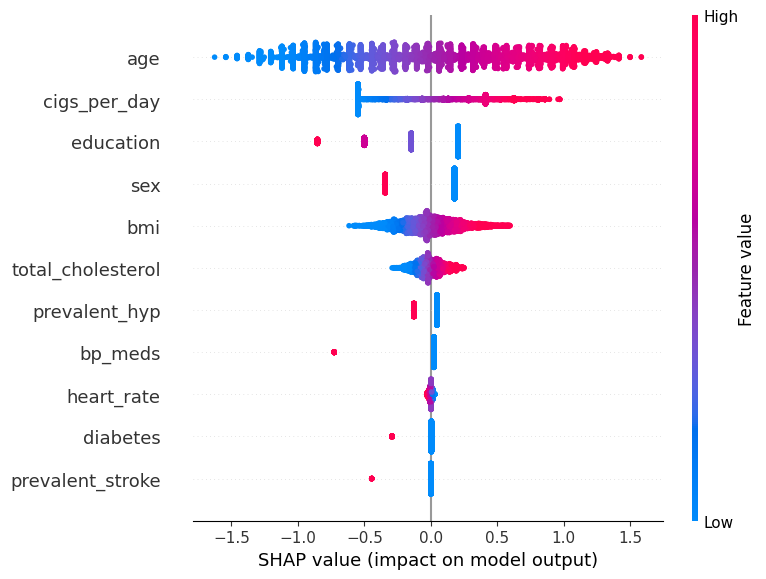

In [99]:
# Initialize the SHAP explainer
explainer_shap = shap.Explainer(model=lr, masker=x_train_sc)

# Calculate SHAP values for the entire dataset
shap_values = explainer_shap.shap_values(x_train_sc)

# shap summary plot
shap.summary_plot(shap_values,x_train_sc,feature_names=x.columns)

  0%|          | 0/20 [00:00<?, ?it/s]

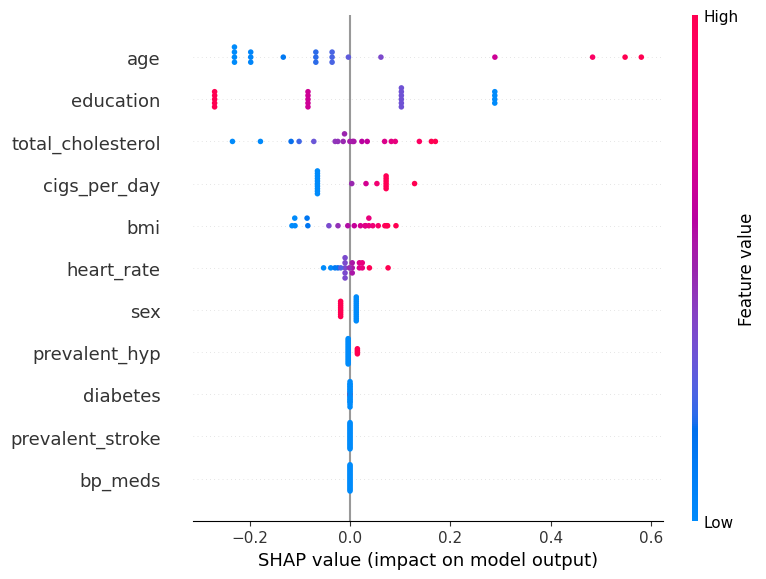

In [100]:
# Create a callable function that takes input data and returns the model predictions
# For SVM models, we use the decision_function() method to get raw decision values
def svm_decision_function(input_data):
    return svm_model.decision_function(input_data)

# Create the explainer using KernelExplainer with the decision_function
explainer_shap = shap.KernelExplainer(model=svm_decision_function, data=x_train_sc[:20])

# Calculate SHAP values for the entire dataset
shap_values = explainer_shap.shap_values(x_train_sc[:20])

# shap summary plot
shap.summary_plot(shap_values, x_train_sc[:20], feature_names=x.columns)


In [101]:
#installing LIME
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=cdc4831fb969382514cb0a132f72deef406b0f2851b10123c20db0b826280020
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [102]:
#Importing libraries
import lime
import lime.lime_tabular
from __future__ import print_function

In [103]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(feature_names = x.columns,
                                                  training_data = np.array(x_train_sc),
                                                  mode='classification')

In [104]:
# Get the explanation for Decision Tree
exp = explainer.explain_instance(data_row = x_test_sc.iloc[24], predict_fn = dtcv.predict_proba)
exp.show_in_notebook(show_table=True)

In [105]:
# Get the explanation for RandomForest
exp = explainer.explain_instance(data_row = x_test_sc.iloc[24], predict_fn = rfcv.predict_proba)
exp.show_in_notebook(show_table=True)

In [106]:
# Get the explanation for XGBOOST
exp = explainer.explain_instance(data_row = x_test_sc.iloc[24], predict_fn = XGBOOST.predict_proba)
exp.show_in_notebook(show_table=True)

# **Conclusion**

<font size = 5> **<font color = 'red'> <u> EDA Insight:** </u>

<font size = 4> **<font color = 'blue'> Distribution Conclusions :**

* Majority of patients have **education level 1 and are female**.
* Smokers and non-smokers are almost evenly split.
* Approximately **100 patients take BP medication**.
* About **22 patients have experienced a stroke**.
* Around **1100 patients have hypertension, and 87 patients are diabetics**.

<font size = 4> **<font color = 'blue'> Risk of Coronary Heart Disease (CHD) :**

* **Males have a higher risk (19%)** compared to females (12%).
* **Smokers have a higher risk (16%)** compared to non-smokers (14%).
* **Patients on BP medication have a significantly higher risk (33%)** compared to others (15%).
* **Patients who had a stroke have a higher risk (45%)** compared to others (15%).
* **Hypertensive patients have a higher risk (24%)** compared to others (11%).
* **Diabetic patients have a higher risk (38%)** compared to others (11%).

<font size = 4> **<font color = 'blue'> General Conclusions :**

* **15% of patients were exposed to CHD risk after a 10-year study.**
* **Data imbalance** exists in the dependent variable.
* Positive correlations between **'is_smoking' and 'cigs_per_day'** as well as **'systolic_bp' and 'diastolic_bp'**.
* Blood pressure influences hypertension development/management.
* Age group around 40 years is most prevalent.
* Patients who smoke consume an **average of 10 cigarettes per day**.

<font size = 5> **<font color = 'red'> <u> ML Models:** </u>

In [107]:
# combining all model score dataframe for final conclusion
resultdf = pd.concat([lr_score, dt_score, rf_score, xgb_score, knn_score, nb_score, svm_score], keys =['Logistic Regression', 'Decision Tree with GridSearchCV', 'Random Forest with GridSearchCV',
                                                                                                                      'XGBOOST','KNearestNeighbors',' Naive Bayes with GridSearchCV',
                                                                                                                     'SVM with GridSearchCV'])
resultdf.drop(columns = 'Model',inplace = True)
resultdf

Recall  AUC_ROC  F1_Score
Logistic Regression             Training set 0    0.69     0.67      0.68
                                Test set     0    0.59     0.64      0.36
Decision Tree with GridSearchCV Training set 0    0.82     0.63      0.69
                                Test set     0    0.81     0.66      0.36
Random Forest with GridSearchCV Training set 0    1.00     0.50      0.67
                                Test set     0    1.00     0.50      0.26
XGBOOST                         Training set 0    0.82     0.63      0.69
                                Test set     0    0.81     0.66      0.36
KNearestNeighbors               Training set 0    0.84     0.70      0.74
                                Test set     0    0.64     0.62      0.33
 Naive Bayes with GridSearchCV  Training set 0    0.82     0.65      0.70
                                Test set     0    0.63     0.58      0.30
SVM with GridSearchCV           Training set 0    0.83     0.65      0.70
                                Test set     0    0.79     0.66      0.36


* **We employed seven different models to predict Ten Year CHD:**

 1. Logistic Regression
 2. Decision Tree with GridSearchCV
 3. Random Forest with GridSearchCV
 4. XGBOOST
 5. KNearestNeighbors
 6. Naive Bayes with GridSearchCV
 7. SVM with GridSearchCV

* Among these models **Decision Tree, Random Forest with GridSearchCV, XGBOOST, and Support Vector Machine with GridSearchCV exhibited the best performance**, achieving high Recall Scores in predicting the Ten Year CHD.

* **Recall scores on the test dataset**:

 - Decision Tree: 81%
 - Random Forest: 100%
 - XGBOOST: 81%
 - SVM: 79%

* **Important features** : Age, heart_rate, total_cholesterol, Cigs_per_day, education